<a href="https://colab.research.google.com/github/nurulnadira/Airbnb-Price-Prediction/blob/main/Airbnb_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Packages Installation**

In [2]:
!pip install geopandas
!pip install autocorrect
!pip install demoji
!pip install emoji
!pip install -U textblob
!pip install plotly==5.6.0
!pip install -U spacy
!pip install pyLDAvis
!pip install contractions
!pip install shutup


import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import datetime as dt
import sys
import seaborn as sns
import matplotlib as plt
import matplotlib.patches as mpatches
import demoji
import emoji
import geopandas as gpd
import nltk
import string
import csv
import re
import spacy
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
import os
import contractions
import warnings
import shutup
import gensim
import gensim.corpora as corpora
from operator import itemgetter
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from textblob import TextBlob
from pprint import pprint
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error #metrics
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from autocorrect import Speller
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer, LancasterStemmer
from nltk import pos_tag
from nltk.tokenize.treebank import TreebankWordDetokenizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from __future__ import print_function


nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

#set column width
pd.option_context('display.max_rows', None, 'display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

#set seaborn style
sns.set(font_scale = 1, palette="rocket",style="whitegrid",rc={"figure.figsize":(15, 8)})

shutup.please()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 11.9 MB/s 
     |████████████████████████████████| 16.7 MB 81.1 MB/s 
     |████████████████████████████████| 6.3 MB 40.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 622 kB 14.0 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622382 sha256=82f8dc014de136f9500a6529f053a77e218cb482bb7df00ce0af3b10827eccc6
  Stored in directory: /root/.cache/pip/wheels/54/d4/37/8244101ad50b0f7d9bffd93ce58ed7991ee1753b290923934b
Successfully built autocorrect
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 1.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |██████████

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Import Dataset**

### **Airbnb Data Listings Dataset**

In [4]:
# Importing the dataset 1 (listings-4)
listings_data = pd.read_csv('gdrive/My Drive/Colab Notebooks/listings-4.csv')

# Importing the London borough boundary GeoJSON file as a dataframe in geopandas
map_data = gpd.read_file('gdrive/My Drive/Colab Notebooks/neighbourhoods.geojson')

**Summary of Dataset** 

In [5]:
#Dataset Information
print("Dataset Shape:",listings_data.shape)
print("\nDataset Type:", listings_data.dtypes)
print("\nDataset Describe \n:",listings_data.describe())

Dataset Shape: (66632, 74)

Dataset Type: id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_i

### **Crime Rate by Neighbourhood Dataset**

Data collected from https://data.london.gov.uk/dataset/recorded_crime_summary

MPS Borough Level Crime (most recent 24 months) - July 2020 - June 2022

In [6]:
# Importing the crime rate data
crime_data = pd.read_csv('gdrive/My Drive/Colab Notebooks/Borough Level Crime Rate.csv')

In [7]:
crime_data.loc[:,'Row_Total'] = crime_data.sum(numeric_only=True, axis=1)
crime_data.drop(crime_data.columns.difference(['LookUp_BoroughName','Row_Total']), 1, inplace=True) #remove unnecessary columns
clean_crime_data=crime_data.groupby(['LookUp_BoroughName']).sum() #summarise number of crime in each boroughs

In [8]:
clean_crime_data.head()

Row_Total
LookUp_BoroughName             
Barking and Dagenham      40145
Barnet                    55132
Bexley                    30923
Brent                     58302
Bromley                   45297

### **Average Property Price by Boroughs**

Obtained from UK House Price Index.

The data was filtered from index price list for London Boroughs in March 2022 to match with the corresponding date from the listing dataset
https://data.london.gov.uk/dataset/uk-house-price-index


In [9]:
# Importing the average property price in London
property_data = pd.read_csv('gdrive/My Drive/Colab Notebooks/Property Index Price London Mar 22.csv')

In [10]:
#Format property price data types
property_data['Property Index Price']=property_data['Property Index Price'].str.replace(r',','')
property_data['Property Index Price']=property_data['Property Index Price'].astype(str).astype(int)

property_data['Neigbourhood'] = property_data['Neigbourhood'].str.strip()
property_data['Neigbourhood']=property_data['Neigbourhood'].str.replace(r'&','and')

property_data.dtypes

Neigbourhood            object
Property Index Price     int64
dtype: object

### **Reviews Dataset**

In [11]:
# Importing the dataset 1 (reviews)
reviews_data = pd.read_csv('gdrive/My Drive/Colab Notebooks/reviews.csv')

In [12]:
reviews_data.head()

listing_id      id        date  reviewer_id reviewer_name  \
0       36299  126573  2010-10-25       238713           Ray   
1       36299  218177  2011-04-05       427486         James   
2       15400   21032  2009-12-21        53815        Hailey   
3       24328  139412  2010-11-15       275656   Christopher   
4       24328  165288  2011-01-04       108257        Branka   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            comments  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    This is a very nice house in a very nice neighborhood.  The five of us had an enjoyable weekend.  Kew Gardens is a bit out of town but no trouble to get to on the Underground.  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Lovely house, great location with convinient transport links.\r<br/>\r<br/>Host provided us with some food and drink upon arrival and was very friendly, helpful and overall a joy to deal with.\r<br/>\r<br/>Will definitely use again.  
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          We loved staying at Phillipa's place in Chelsea. The flat was lovely, and the neighborhood was great. Lots of fun shops, and close to two metro stops. We would love to stay there again!  
3  The communication with Joe was very easy. We received accurate direction upon arrival and Joe made us feel welcome before we met. \r<br/>\r<br/>We stayed for three nights and we would definitely come again.\r<br/>The location is easy to reach via TFL and the area offers a different view from the other side of the river Thames. We even managed to go for a run in Battersea Park. Great!\r<br/>The two owners are very nice and make you feel very welcome. The beautiful house with its stylish and well chosen interior gives a warm comfort.\r<br/>\r<br/>We can really recommend this place. It is a very good alternative to main stream locations and it instantly becomes your little home in this amazing city.  
4                                                              

# **Data Cleaning and Pre-Processing**

## **Listings Dataset**

In [13]:
def remove_columns(dataset, to_remove):
    ### BEGIN SOLUTION    
    data = dataset.drop(to_remove, axis=1)
    ### END SOLUTION
    return data

def get_val_from_list(row, column_name, value):
    val = 0.0
    try:
        vals = row[column_name].replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(',')
        if value in vals:
            val = 1.0
    except:
        val = 0.0
    return val
    
def split_list_into_columns(df, column_name, max_dummies_num = 10):    
    # get dictionary of unique values in lists across dataset rows
    values_dict = {}

    for unique_value in df[column_name].unique(): 
        for value in unique_value.replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(','):
            if value in values_dict:
                values_dict[value] = values_dict[value] + 1
            else:
                values_dict[value] = 0
                
    values_sorted = sorted(values_dict.items(), key=lambda kv: kv[1], reverse = True)
      
    # split into columns
    for value in values_sorted[: max_dummies_num]:
        df[column_name + '_' + value[0]] = df.apply(lambda row: get_val_from_list(row, column_name, value[0]),axis=1)
        
    return

In [14]:
#1. Remove duplicates - Ensure there's no duplicate in the data
listings_data.drop_duplicates()

#2. Remove unnecessary columns
to_remove=['scrape_id','last_scraped','neighbourhood','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','host_name','host_url','host_listings_count','host_total_listings_count','host_thumbnail_url','host_picture_url','has_availability','availability_30','availability_60','availability_90','availability_365','calendar_last_scraped']
listings_data_clean_1=remove_columns(listings_data,to_remove)

#3. Remove columns with no values
to_remove=['neighbourhood_group_cleansed','license','bathrooms','calendar_updated']
listings_data_clean_1=remove_columns(listings_data_clean_1,to_remove)

#4. Convert price column to numeric
listings_data_clean_2=listings_data_clean_1.copy()
listings_data_clean_2["price_clean"] = listings_data_clean_1["price"].replace({'\$':'',',': ''}, regex = True)
listings_data_clean_2["price_clean"] = listings_data_clean_2["price_clean"].astype(float, errors = 'raise')

#5. Format date columns
#listings_data_clean_2['host_since'] = listings_data_clean_2['host_since'].astype('datetime64')
#listings_data_clean_2['first_review'] = listings_data_clean_2['first_review'].astype('datetime64')
#listings_data_clean_2['last_review'] = listings_data_clean_2['last_review'].astype('datetime64')
to_remove=['host_since','first_review','last_review']
listings_data_clean_2=remove_columns(listings_data_clean_2,to_remove)

#6. Split list to columns
split_list_into_columns(listings_data_clean_2, 'amenities')
split_list_into_columns(listings_data_clean_2, 'host_verifications')
to_remove=['price','host_verifications']
listings_data_clean_2=remove_columns(listings_data_clean_2,to_remove)

<>:14: DeprecationWarning: invalid escape sequence \$
<>:14: DeprecationWarning: invalid escape sequence \$
<>:14: DeprecationWarning: invalid escape sequence \$
<ipython-input-14-786970a12815>:14: DeprecationWarning: invalid escape sequence \$
  listings_data_clean_2["price_clean"] = listings_data_clean_1["price"].replace({'\$':'',',': ''}, regex = True)


In [15]:
print("Dataset Shape:",listings_data_clean_2.shape)

Dataset Shape: (66632, 65)


In [16]:
#Check for columns with NAN
print(listings_data_clean_2.isna().sum())

id                                                  0
listing_url                                         0
name                                               24
description                                      2192
neighborhood_overview                           27563
picture_url                                         0
host_id                                             0
host_location                                     158
host_about                                      30034
host_response_time                              31773
host_response_rate                              31773
host_acceptance_rate                            28282
host_is_superhost                                  24
host_neighbourhood                              20462
host_has_profile_pic                               24
host_identity_verified                             24
neighbourhood_cleansed                              0
latitude                                            0
longitude                   

In [17]:
#Dealing with NAN values
#Going through the columns with NAN values, some of the columns has NAN values. (Eg. 24 missing rows on host information)
#As 24 rows are not a significant, hence it will be removed.

listings_data_clean_2=listings_data_clean_2.dropna(subset=['name','bathrooms_text','description','host_location'])

#For empty bedrooms, upon random checking it was noted that these listings are actually studio unit. Hence, the NA will be filled with 0.
#listings_data_clean_2.bedrooms.fillna(0)
listings_data_clean_3=listings_data_clean_2.copy()
listings_data_clean_3[['bedrooms']] = listings_data_clean_3[['bedrooms']].fillna(0)

#For bedrooms, there are 1519 rows with empty rows. 
#Upon checking, these could mean that it could fit 1 or 2 guests. 
#However, since the number of missing rows accounts to only 2% of the data
#will remove the rows with empty column
listings_data_clean_3=listings_data_clean_3.dropna(subset=['beds'])

#For empty description, replaced it with no information provided
listings_data_clean_3[['neighborhood_overview','host_neighbourhood','host_about']] = listings_data_clean_3[['neighborhood_overview','host_neighbourhood','host_about']].fillna('No information provided')

#Remove rows with missing values in reviews
#listings_data_clean_4=listings_data_clean_3.dropna(subset=['first_review','last_review','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month'])
listings_data_clean_4=listings_data_clean_3.dropna(subset=['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month'])

#convert rate into float
listings_data_clean_5=listings_data_clean_4.copy()
listings_data_clean_5['host_response_rate'] = listings_data_clean_4['host_response_rate'].str.rstrip('%').astype('float')
listings_data_clean_5['host_acceptance_rate'] = listings_data_clean_4['host_acceptance_rate'].str.rstrip('%').astype('float')

#Impute host response and acceptance rate with mean
listings_data_clean_5['host_response_rate']=listings_data_clean_5['host_response_rate'].fillna(listings_data_clean_5['host_response_rate'].mean())
listings_data_clean_5['host_acceptance_rate']=listings_data_clean_5['host_acceptance_rate'].fillna(listings_data_clean_5['host_acceptance_rate'].mean())

#Impute categorical variable (host response time) with mode - the most frequent
#listings_data_clean_5['host_response_time'].value_counts()
listings_data_clean_5[['host_response_time']]=listings_data_clean_5[['host_response_time']].fillna('within an hour')

In [18]:
listings_data_clean_6=listings_data_clean_5.copy()

#using index to match crime and property index price
listings_data_clean_6.set_index('neighbourhood_cleansed',inplace=True)
listings_data_clean_6["crime"]=listings_data_clean_6.index.map(clean_crime_data['Row_Total'])

property_data.set_index('Neigbourhood',inplace=True)
listings_data_clean_6["Property Index Price"]=listings_data_clean_6.index.map(property_data['Property Index Price'])

listings_data_clean_6 = listings_data_clean_6.reset_index()

listings_data_clean_6['crime']=listings_data_clean_6['crime'].fillna(listings_data_clean_6['crime'].mean()) #fill in the NA 

In [19]:
# Renaming the neighbourhood column
listings_data_clean_6.rename(columns={'neighbourhood_cleansed': 'Borough'}, inplace=True)

## **Reviews Dataset**

### **Text Cleaning**

In [20]:
#1. Remove duplicates - Ensure there's no duplicate in the data
#reviews_data_1=reviews_data.drop_duplicates()

#2. Remove Empty Rows
#print(reviews_data.isnull().sum())
#reviews_data.shape

#Since there's only 82 rows with missing value out of 1068590, remove the empty rows
#reviews_data_1=reviews_data_1.dropna(subset=['comments'])

#Remove Unnecessary Columns
#reviews_data_1=reviews_data_1.drop(columns='reviewer_name')

### **Text Pre-Processing**

In [21]:
wordnet_lemmatizer=WordNetLemmatizer()
lanc_stemmer=LancasterStemmer()
porter_stemmer=PorterStemmer()
nlp=spacy.load('en_core_web_sm')
stop=stopwords.words('english')

def pre_process(reviews):
  reviews_data_1['clean_comments']=reviews_data_1['comments'].str.lower() #lowercase reviews
  reviews_data_1['clean_comments']=reviews_data_1['clean_comments'].str.replace(r'\d+','') #remove numeric characters
  reviews_data_1['clean_comments']=reviews_data_1['clean_comments'].str.replace(r'<br/>','')
  reviews_data_1['clean_comments']=reviews_data_1['clean_comments'].str.replace(r'\r','')
  return reviews

def contraction_text(sentence):
  tokens=sentence.split()
  expand_text=[contractions.fix(token) for token in tokens]
  return ' '.join(expand_text)

def remove_special_characters(reviews):
  reviews["processed_reviews"]=reviews['expand_contractions'].str.replace(r'[^\w\s]','') #remove special characters
  return reviews

def remove_unwanted_spaces(reviews):
  reviews["processed_reviews_final"]=reviews["processed_reviews"].str.strip()
  return reviews

def remove_stopwords(data,col_to_remove,new_column):
    data[col_to_remove] = data[new_column].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    return data  

In [22]:
#processed_reviews=pre_process(reviews_data_1)
#processed_reviews['expand_contractions']=processed_reviews['clean_comments'].apply(contraction_text)
#processed_reviews=remove_special_characters(processed_reviews)
#processed_reviews=remove_unwanted_spaces(processed_reviews)


In [23]:
#remove stopwords
#reviews=remove_stopwords(processed_reviews,'no_stopwords_2','processed_reviews_final')

### **Sentiment Analysis**

In [24]:
analyzer = SentimentIntensityAnalyzer()

def sent_analysis(dataset, which_col_to_sent):
    dataset['VADER sentiment'] = [analyzer.polarity_scores(x)['compound'] for x in dataset[which_col_to_sent]]
    #dataset['neg'] = [analyzer.polarity_scores(x)['neg'] for x in dataset[which_col_to_sent]]
    #dataset['neu'] = [analyzer.polarity_scores(x)['neu'] for x in dataset[which_col_to_sent]]
    #dataset['pos'] = [analyzer.polarity_scores(x)['pos'] for x in dataset[which_col_to_sent]] 
    return dataset

def plot_cloud(wordcloud,title):
    wordcloud_one_star = WordCloud(width= 5000, height = 3000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False).generate(' '.join(wordcloud['Untokenize_clean_content']))
    plt.imshow(wordcloud_one_star)
    plt.title(title)
    plt.axis("off")
    plt.show()

In [25]:
#sentiment analysis using VADER
#final_processed_reviews=sent_analysis(reviews,'no_stopwords_2')

In [26]:
#sentiment analysis using VADER
#final_processed_reviews_2=sent_analysis(processed_reviews,'processed_reviews_final')

In [27]:
#save files
#final_processed_reviews_2.to_csv('gdrive/My Drive/Colab Notebooks/processed_reviews.csv')

In [28]:
# Importing the average property price in London
final_processed_reviews_2 = pd.read_csv('gdrive/My Drive/Colab Notebooks/processed_reviews.csv')

In [29]:
#final processed reviews including stop words removal
#final_processed_reviews.loc[[11]]

In [30]:
#final processed reviews without stop words removal
final_processed_reviews_2.loc[[11]]


Unnamed: 0 listing_id      id        date reviewer_id  \
11          5      36299  231819  2011-04-19      443197   

                                                                                                                                                                                                                                                                                                                         comments  \
11  This is a wonderful location. This house is in a lovely neighborhood, has a nearby train station,grocery stores,tow path along the Thames and is within walking distance to Kew Botanical Gardens. Geert was very helpful and made himself available to answer any questions we had regarding our trip. We highly recommend!    

                                                                                                                                                                                                                                                                                                                   clean_comments  \
11  this is a wonderful location. this house is in a lovely neighborhood, has a nearby train station,grocery stores,tow path along the thames and is within walking distance to kew botanical gardens. geert was very helpful and made himself available to answer any questions we had regarding our trip. we highly recommend!    

                                                                                                                                                                                                                                                                                                             expand_contractions  \
11  this is a wonderful location. this house is in a lovely neighborhood, has a nearby train station,grocery stores,tow path along the thames and is within walking distance to kew botanical gardens. geert was very helpful and made himself available to answer any questions we had regarding our trip. we highly recommend!   

                                                                                                                                                                                                                                                                                                        processed_reviews  \
11  this is a wonderful location this house is in a lovely neighborhood has a nearby train stationgrocery storestow path along the thames and is within walking distance to kew botanical gardens geert was very helpful and made himself available to answer any questions we had regarding our trip we highly recommend   

                                                                                                                                                                                                                                                                                                  processed_reviews_final  \
11  this is a wonderful location this house is in a lovely neighborhood has a nearby train stationgrocery storestow path along the thames and is within walking distance to kew botanical gardens geert was very helpful and made himself available to answer any questions we had regarding our trip we highly recommend   

                                                                                                                                                                                                                      no_stopwords_2  \
11  wonderful location house lovely neighborhood nearby train stationgrocery storestow path along thames within walking distance kew botanical gardens geert helpful made available answer questions regarding trip highly recommend   

    VADER sentiment  
11           0.9244

### **Merge Reviews with main dataframe**

In [31]:
#Calculate mean polarity score for each listings ID
reviews = final_processed_reviews_2.groupby(['listing_id'], axis=0, as_index=False).mean()
reviews_df = final_processed_reviews_2[['listing_id', 'VADER sentiment']]

#Merge sentiment with listing in main dataframe
listings_data_clean_7=listings_data_clean_6.copy()
listings_data_clean_7['Sentiment'] = listings_data_clean_7.index.map(reviews_df['VADER sentiment'])
listings_data_clean_7 = listings_data_clean_7.reset_index()

listings_data_clean_7=listings_data_clean_7.dropna(subset=['Sentiment'])

In [32]:
listings_data_clean_7.head()

index                 Borough     id                         listing_url  \
0       0    Richmond upon Thames  36299  https://www.airbnb.com/rooms/36299   
1       1                Haringey  36660  https://www.airbnb.com/rooms/36660   
2       2              Wandsworth  24328  https://www.airbnb.com/rooms/24328   
10     10  Hammersmith and Fulham  38610  https://www.airbnb.com/rooms/38610   
11     11                Haringey  38950  https://www.airbnb.com/rooms/38950   

                                                  name  \
0                  Kew Gardens 3BR house in cul-de-sac   
1                      You are GUARANTEED to love this   
2   Battersea bedroom & studio, parking, shared garden   
10                                CHARMING FAMILY HOME   
11    Room 1 Large Double Bedroom - front ground floor   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 description  \
0   3 Bed House with garden close to Thames river (2 min walk, private road to river nearby), on the District Line Underground (7 min walk) for direct access into Central London, near Kew Gardens. Kids playground in walking distance along the Thames tow path.<br /><br /><b>The space</b><br />Residential neighborhood, mix of English and corporate expat families. House is in a cul-de-sac with a private road to the river Thames at its end. River about 300 feet away. Walking distance to subway (7 min). <br /><br />Central London via the underground: 30-40 min, the District line (Kew Gardens stop 7 min walk - Zone 3). In addition, the Overground to Stratford also stops at the Kew Gardens underground station (Kew Gardens stop 7 min walk). Further, there is an overland railway station at Kew Bridge (10 min walk) to take you to Waterloo railway station in 21 minutes. <br />By bicycle one can follow the towpath to Hammersmith Bridge or continue to Putney Bridge (50 min). <br />Lastly, several Stree   
1   <b>The space</b><br />This room is located on the ground floor of the house. It is lovely, a very good size with a double bed and has a beautiful view of the garden, with your own door leading out to the patio. AND a plentiful breakfast is included in the price of the room!<br /><br />Blenheim Lodge is a beautiful house in a quiet upmarket residential area in North London, the perfect place to rest and recover after a busy day out sightseeing. You can take advantage of the big garden in the summer months, when it is full of colourful flowers and wildlife. <br /><br />Our house is in Zone 3, 20 minutes by underground to London Bridge and Kings Cross and just 10 minutes to Camden Market. The nearest station is East Finchely and is 5 minutes walking distance from our house. <br /> <br /><br />Cinema, shops, pubs and restaurants are minutes away from the house. <br /><br />If you do not mind changing rooms in order to cover your requested days please contact me as I might be able to book y   
2   Artist house, bright high ceiling rooms, private parking and a communal garden in a conservation area near Battersea Park. Bedroom with double bed

# **Exploratory Data Analysis**

## **Descriptive Statistics**

In [33]:
EDA_df=listings_data_clean_6.copy()
EDA_df.describe()

id       host_id  host_response_rate  host_acceptance_rate  \
count  4.515800e+04  4.515800e+04        45158.000000          45158.000000   
mean   6.087826e+15  9.704911e+07           92.816391             78.498250   
std    5.772662e+16  1.111527e+08           13.994211             22.871872   
min    1.540000e+04  4.775000e+03            0.000000              0.000000   
25%    1.499547e+07  1.439342e+07           92.816391             78.498250   
50%    2.594973e+07  4.579636e+07           92.816391             78.498250   
75%    3.947634e+07  1.490721e+08          100.000000             96.000000   
max    5.752054e+17  4.475593e+08          100.000000            100.000000   

           latitude     longitude  accommodates      bedrooms          beds  \
count  45158.000000  45158.000000  45158.000000  45158.000000  45158.000000   
mean      51.508985     -0.128356      3.121352      1.420568      1.781390   
std        0.047546      0.096220      1.923194      0.907954      1.295859   
min       51.290570     -0.510650      1.000000      0.000000      1.000000   
25%       51.482656     -0.188410      2.000000      1.000000      1.000000   
50%       51.513490     -0.124125      2.000000      1.000000      1.000000   
75%       51.538590     -0.069863      4.000000      2.000000      2.000000   
max       51.685220      0.288570     16.000000     22.000000     60.000000   

       minimum_nights  maximum_nights  number_of_reviews  \
count    45158.000000    4.515800e+04       45158.000000   
mean         5.318127    3.463614e+04          23.164644   
std         24.126742    5.314727e+06          43.649265   
min          1.000000    1.000000e+00           1.000000   
25%          1.000000    3.500000e+01           3.000000   
50%          2.000000    1.125000e+03           8.000000   
75%          4.000000    1.125000e+03          24.000000   
max       1124.000000    1.000000e+09        1056.000000   

       number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  \
count           45158.000000            45158.000000          45158.000000   
mean                3.755791                0.371562              4.668328   
std                10.906763                1.364748              0.513321   
min                 0.000000                0.000000              0.000000   
25%                 0.000000                0.000000              4.550000   
50%                 0.000000                0.000000              4.830000   
75%                 4.000000                0.000000              5.000000   
max               729.000000              105.000000              5.000000   

       review_scores_accuracy  review_scores_cleanliness  \
count            45158.000000               45158.000000   
mean                 4.736222                   4.625786   
std                  0.495382                   0.572001   
min                  0.000000                   0.000000   
25%                  4.670000                   4.500000   
50%                  4.900000                   4.810000   
75%                  5.000000                   5.000000   
max                  5.000000                   5.000000   

       review_scores_checkin  review_scores_communication  \
count           45158.000000                 45158.000000   
mean                4.796847                     4.811058   
std                 0.452392                     0.449364   
min                 0.000000                     0.000000   
25%                 4.780000                     4.800000   
50%                 4.960000                     4.990000   
75%                 5.000000                     5.000000   
max                 5.000000                     5.000000   

       review_scores_location  review_scores_value  \
count            45158.000000         45158.000000   
mean                 4.748968             4.636351   
std                  0.417552             0.513624   
min                  0.000000             

## **Evaluating Competition**

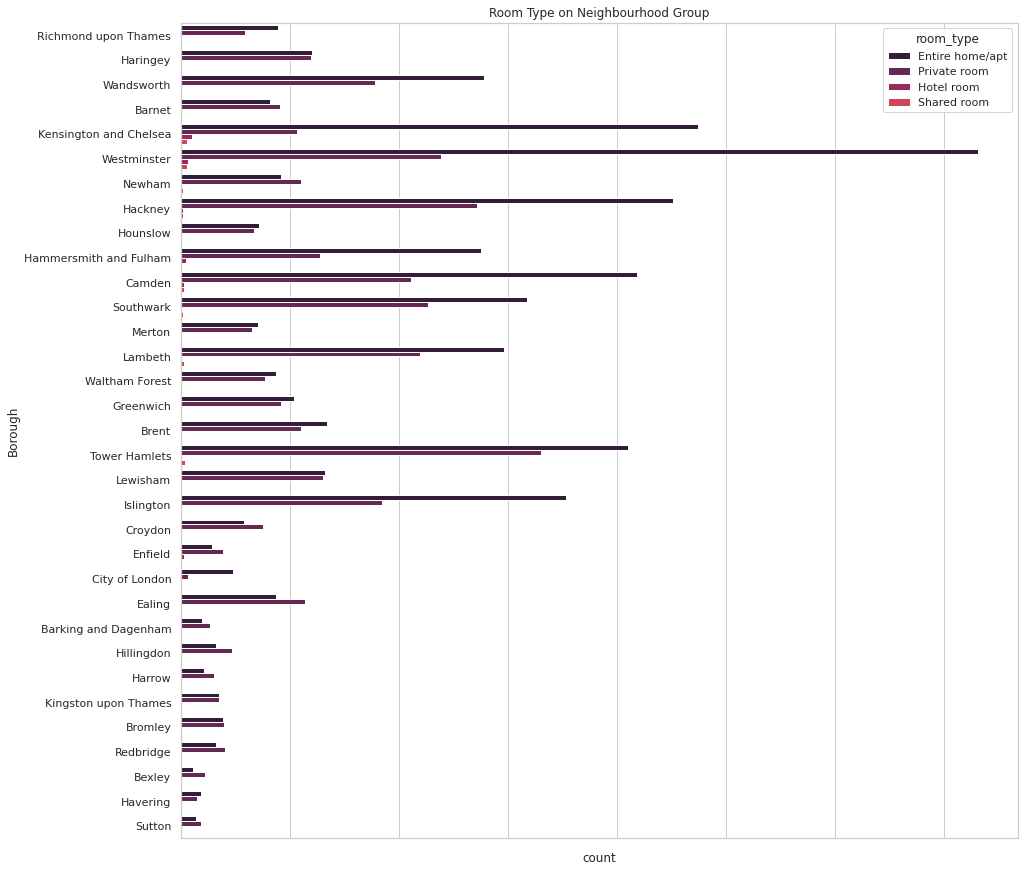

In [34]:
import matplotlib.pyplot as plt
sns.set(font_scale = 1, palette="rocket",style="whitegrid")
plt.figure(figsize=(15,15))
plt.title("Room Type on Neighbourhood Group")
plt.xticks(rotation='horizontal')
ax=sns.countplot(y="Borough",hue="room_type",data=EDA_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

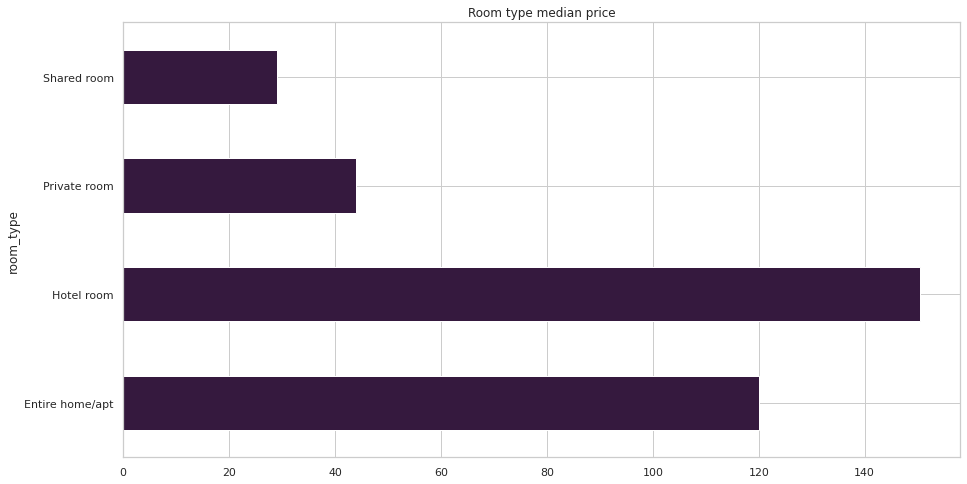

In [35]:
type_price=EDA_df.groupby(['room_type'])['price_clean'].median().plot(kind='barh',title='Room type median price')  

## **It is all about location, or is it?**

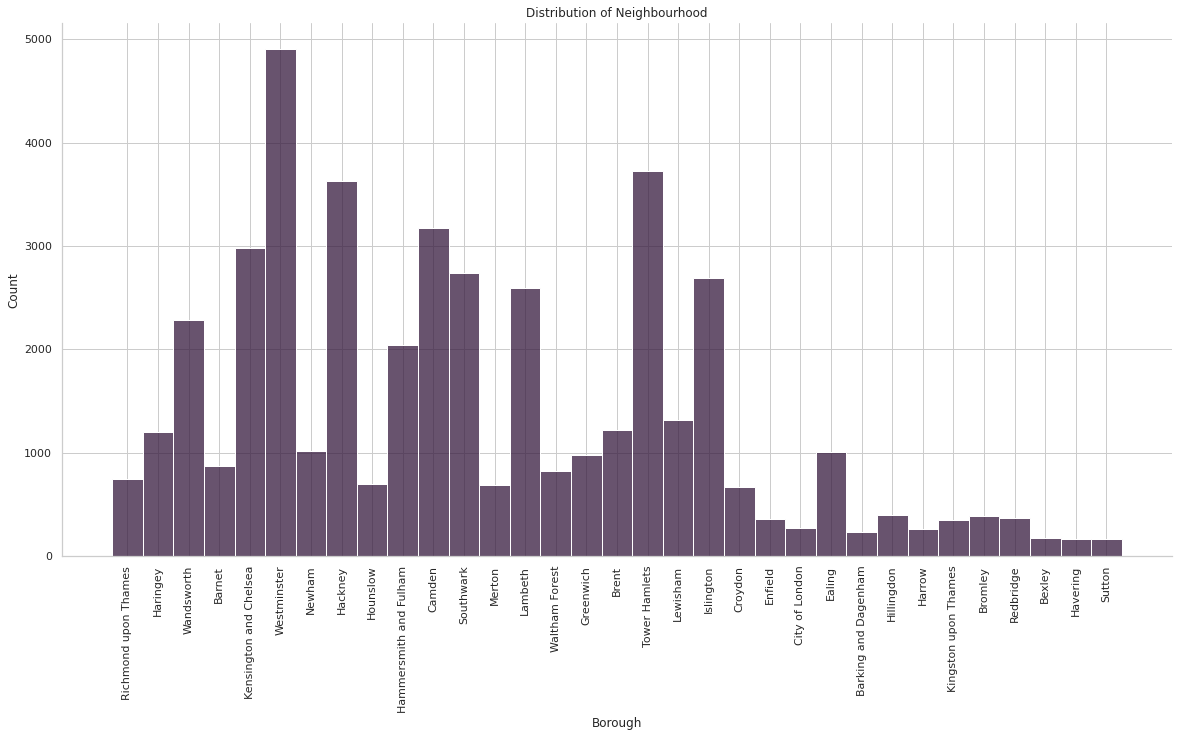

In [36]:
#Neighbourhood Distribution
sns.set(font_scale = 1, palette="rocket",style="whitegrid",rc={"figure.figsize":(15, 8)})
ax=sns.displot(EDA_df, x="Borough",height=8.27, aspect=2/1).set(title="Distribution of Neighbourhood")
ax.set_xticklabels(rotation=90)

In [37]:
# Dropping the empty column
map_data.drop('neighbourhood_group', axis=1, inplace=True)

In [38]:
# Creating a dataframe of listing counts and median price by borough
df_borough = pd.DataFrame(EDA_df.groupby('Borough').size())
df_borough.rename(columns={0: 'number_of_listings'}, inplace=True)
df_borough['median_price'] = EDA_df.groupby('Borough').price_clean.median().values

# Joining the dataframes
df_borough = map_data.set_index('neighbourhood').join(df_borough)

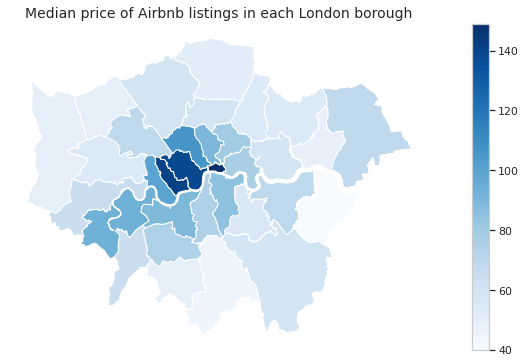

In [39]:
# Plotting the median price of listings in each borough
fig2, ax2 = plt.subplots(1, figsize=(15, 6))
df_borough.plot(column='median_price', cmap='Blues', ax=ax2)
ax2.axis('off')
ax2.set_title('Median price of Airbnb listings in each London borough', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=min(df_borough.median_price), vmax=max(df_borough.median_price)))
sm._A = [] # Creates an empty array for the data range
cbar = fig2.colorbar(sm)
plt.show()

In [40]:
df_borough.median_price

neighbourhood
Kingston upon Thames       65.0
Croydon                    45.0
Bromley                    60.0
Hounslow                   65.0
Ealing                     55.0
Havering                   69.0
Hillingdon                 50.0
Harrow                     50.0
Brent                      70.0
Barnet                     60.0
Enfield                    52.0
Waltham Forest             55.0
Redbridge                  55.0
Sutton                     50.0
Lambeth                    75.0
Southwark                  85.0
Lewisham                   56.0
Greenwich                  70.0
Bexley                     40.0
Richmond upon Thames       93.5
Merton                     75.0
Wandsworth                 89.0
Hammersmith and Fulham    100.0
Kensington and Chelsea    142.0
City of London            149.0
Westminster               139.0
Camden                    106.0
Tower Hamlets              77.0
Islington                  90.0
Hackney                    80.0
Haringey                  

In [41]:
to_export = EDA_df[['id','host_id','host_location','Borough','latitude','longitude','room_type','accommodates','price_clean']]

to_export.to_csv('gdrive/My Drive/Colab Notebooks/Clean_listings_EDA')

In [42]:
EDA_df.Borough.unique()

array(['Richmond upon Thames', 'Haringey', 'Wandsworth', 'Barnet',
       'Kensington and Chelsea', 'Westminster', 'Newham', 'Hackney',
       'Hounslow', 'Hammersmith and Fulham', 'Camden', 'Southwark',
       'Merton', 'Lambeth', 'Waltham Forest', 'Greenwich', 'Brent',
       'Tower Hamlets', 'Lewisham', 'Islington', 'Croydon', 'Enfield',
       'City of London', 'Ealing', 'Barking and Dagenham', 'Hillingdon',
       'Harrow', 'Kingston upon Thames', 'Bromley', 'Redbridge', 'Bexley',
       'Havering', 'Sutton'], dtype=object)

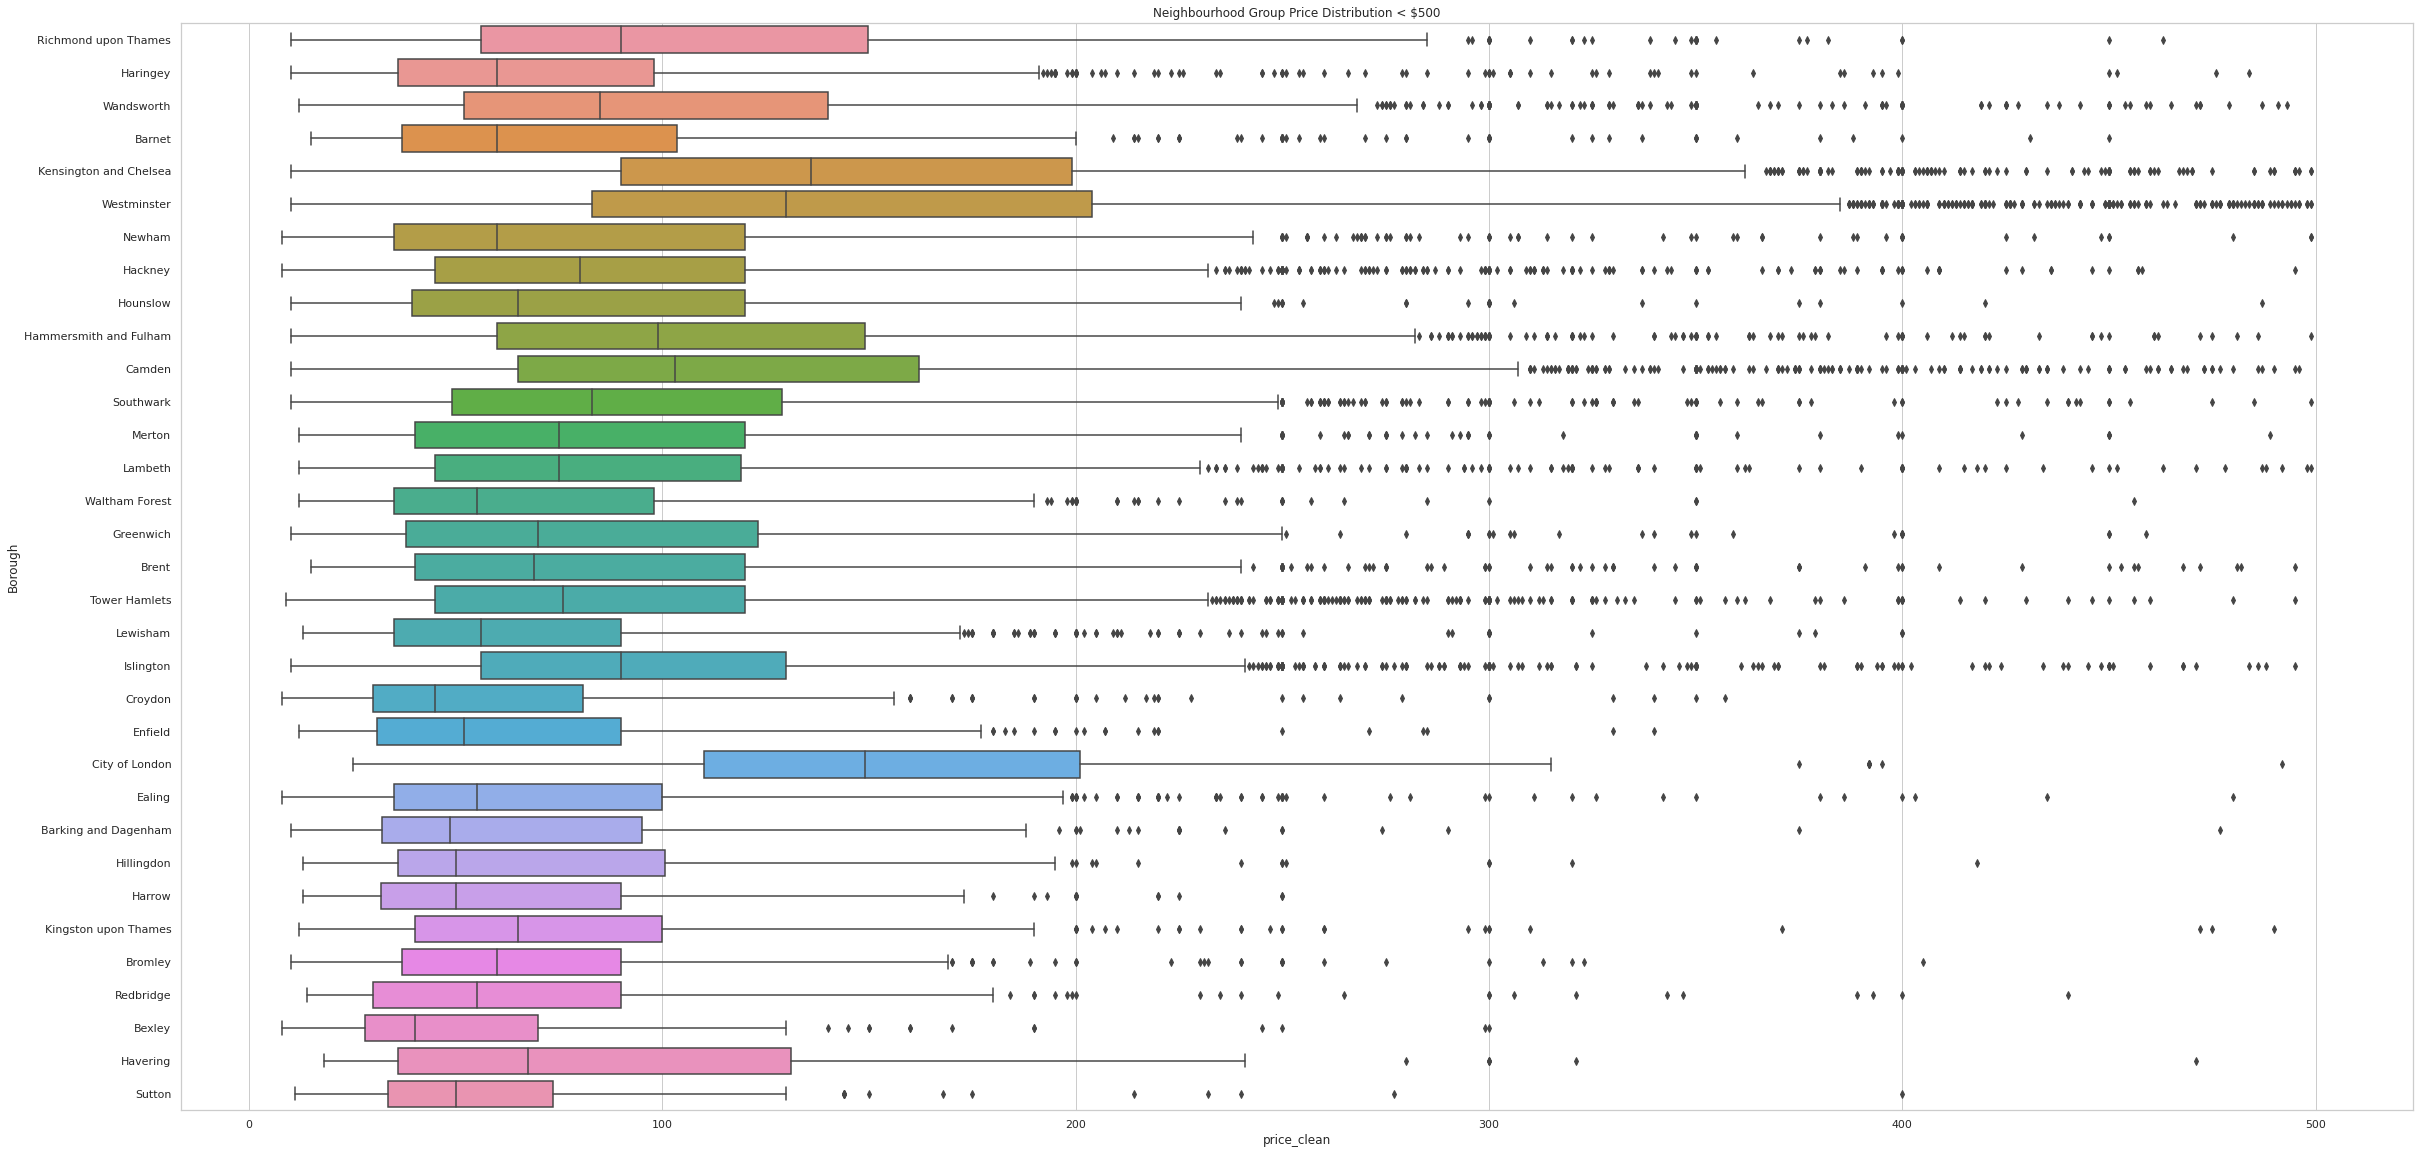

In [43]:
import matplotlib.pyplot as plt
sns.set(font_scale = 1, palette="rocket",style="whitegrid")
plt.figure(figsize=(40,20))
plt.title("Neighbourhood Group Price Distribution < $500")
sns.boxplot(y="Borough",x ='price_clean',orient="h", data = EDA_df[EDA_df.price_clean<500])
plt.show()

## **The hosts demographic**

[Text(0.5, 1.0, 'Top 5 Airbnb Hosts in London')]

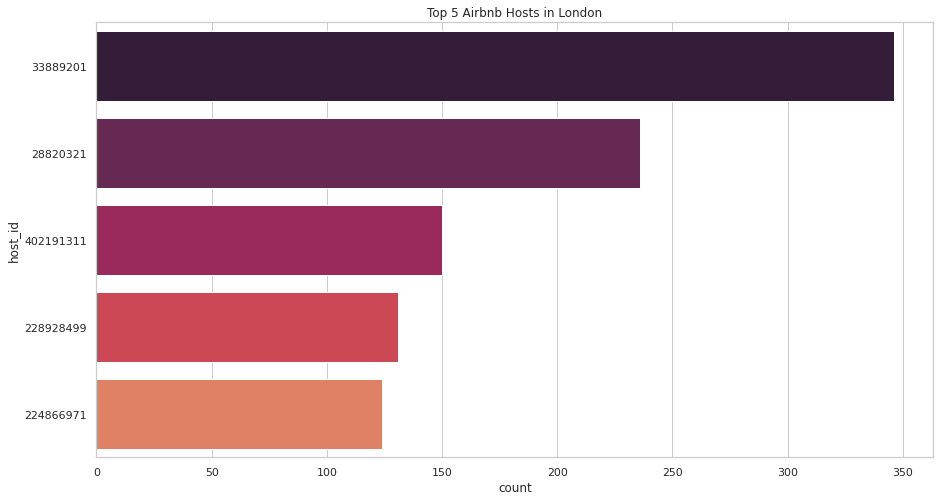

In [44]:
#Top Airbnb Hosts
sns.countplot(y="host_id", data=EDA_df, order=EDA_df.host_id.value_counts().iloc[:5].index).set(title="Top 5 Airbnb Hosts in London")

#listings_data_clean_5.loc[listings_data_clean_5['host_id']==33889201]

In [45]:
#Top 10 Host by host name, room type and neighbourhood
EDA_df[['host_id']].value_counts().head(10)

host_id  
33889201     346
28820321     236
402191311    150
228928499    131
224866971    124
48165024     123
83740964     119
27572615      83
1432477       67
74167394      61
dtype: int64

## **Does it matter much if you are a Superhost?**

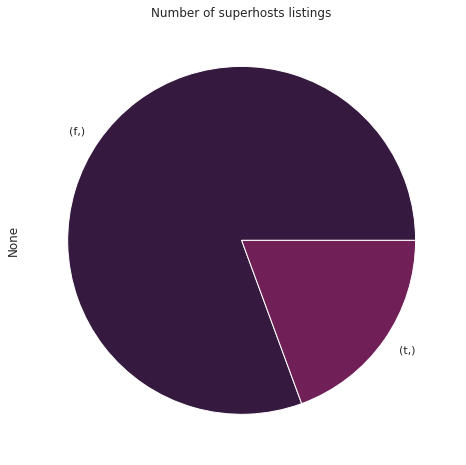

In [46]:
EDA_df[['host_is_superhost']].value_counts().plot(kind='pie',title='Number of superhosts listings')  

In [47]:
# Plotting the pie chart for above dataframe
#EDA_df.groupby(['host_is_superhost']).sum().plot(kind='pie', y='host_is_superhost')

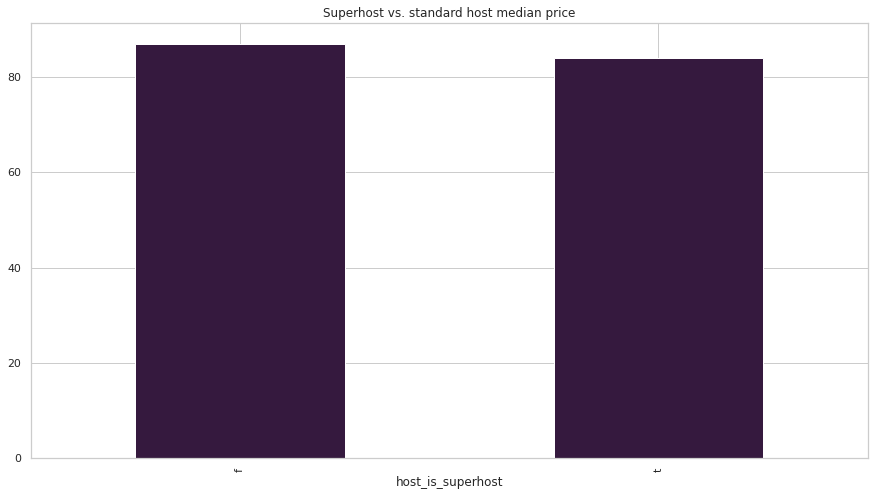

In [48]:
EDA_df.groupby(['host_is_superhost'])['price_clean'].median().plot(kind='bar',title='Superhost vs. standard host median price')  

## **Accommodates**

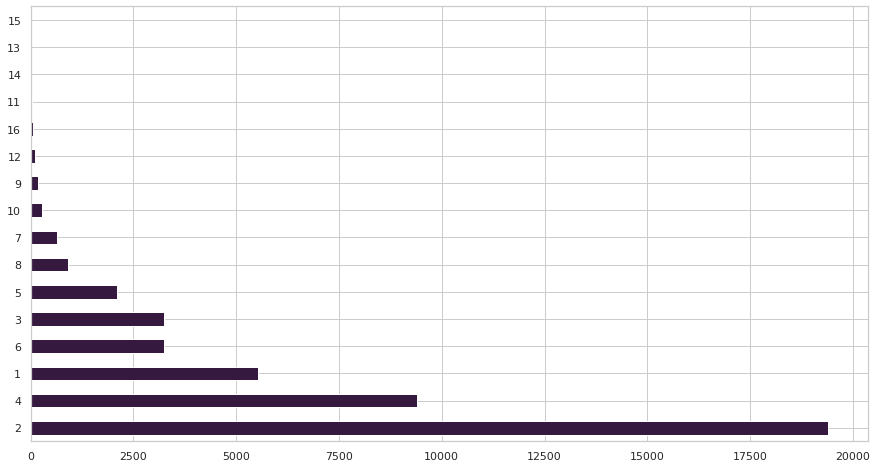

In [49]:
EDA_df.accommodates.value_counts().plot(kind='barh')

## **Airbnb Guest Ratings**

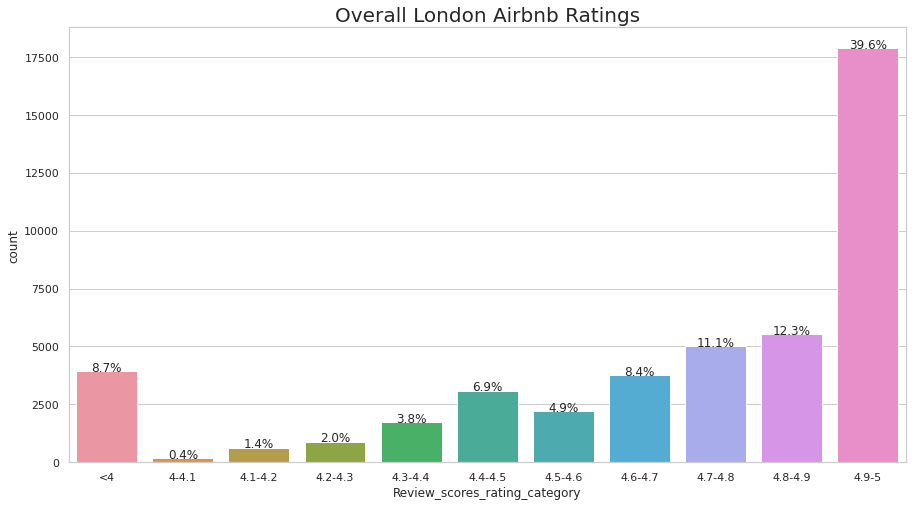

In [50]:
#Categorise Ratings
EDA_df['Review_scores_rating_category'] = pd.cut(EDA_df['review_scores_rating'],
                                                                [1,4,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5], 
                                                                labels=['<4','4-4.1','4.1-4.2','4.2-4.3','4.3-4.4','4.4-4.5','4.5-4.6','4.6-4.7','4.7-4.8','4.8-4.9','4.9-5'])

#Overall Rating Distribution Graph

sns.set(font_scale = 1, palette="rocket",style="whitegrid",rc={"figure.figsize":(15, 8)})

total = float(len(EDA_df))

ax = sns.countplot(x="Review_scores_rating_category", data=EDA_df)

plt.title('Overall London Airbnb Ratings', fontsize=20)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + (p.get_width()/2)
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

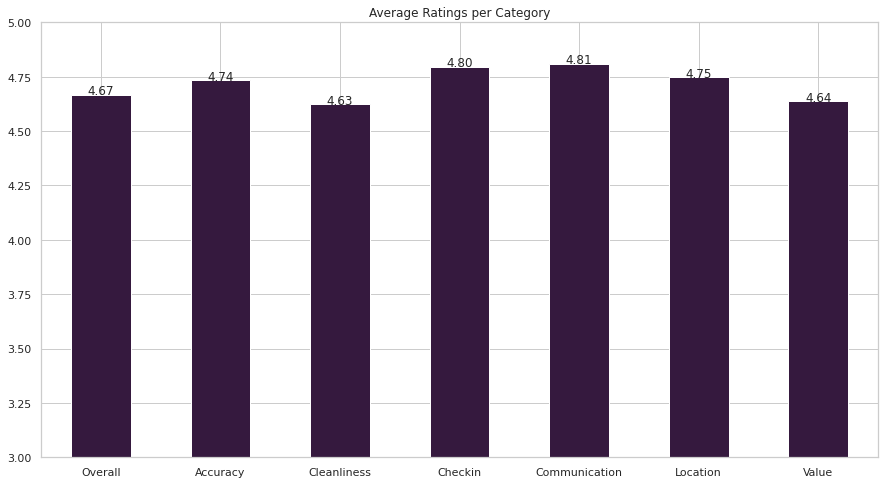

In [51]:
#Average Ratings
avg_cols = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

ax=EDA_df[avg_cols].mean().plot(kind='bar')
ax.set_xticklabels(('Overall','Accuracy', 'Cleanliness','Checkin','Communication','Location','Value'),rotation="0")
ax.set_title('Average Ratings per Category')

plt.ylim([3, 5])

for p in ax.patches:
    #percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    mean="{:.2f}".format(p.get_height())
    x = p.get_x() + (p.get_width()/2)
    y = p.get_height()
    ax.annotate(mean, (x, y),ha='center')

In [52]:
def model_random_forest(TEST_SIZE,RAND_STATE,df,X,y):
  #prepare train and test datasets for modelling

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

  #train RF regressor model
  forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=RAND_STATE, 
                               n_jobs=-1)

  forest.fit(X_train, y_train.squeeze())

  #calculate scores for the model
  y_train_preds = forest.predict(X_train)
  y_test_preds = forest.predict(X_test)

  print('Random Forest MSE train: %.3f, test: %.3f' % (
          mean_squared_error(y_train, y_train_preds),
          mean_squared_error(y_test, y_test_preds)))
  print('Random Forest R^2 train: %.3f, test: %.3f' % (
          r2_score(y_train, y_train_preds),
          r2_score(y_test, y_test_preds)))

  #get feature importances from the model
  headers = ["name", "score"]
  values = sorted(zip(X_train.columns, forest.feature_importances_), key=lambda x: x[1] * -1)
  forest_feature_importances = pd.DataFrame(values, columns = headers)
  forest_feature_importances = forest_feature_importances.sort_values(by = ['score'], ascending = False)

  features = forest_feature_importances['name'][:15]
  y_pos = np.arange(len(features))
  scores = forest_feature_importances['score'][:15]

  #plot feature importances
  plt.figure(figsize=(10,5))
  plt.bar(y_pos, scores, align='center', alpha=0.5)
  plt.xticks(y_pos, features, rotation='vertical')
  plt.ylabel('Score')
  plt.xlabel('Features')
  plt.title('Feature importances (Random Forest)')

  plt.savefig('feature importances RF.png')
  
  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Random Forest MSE train: 0.026, test: 0.054
Random Forest R^2 train: 0.903, test: 0.785


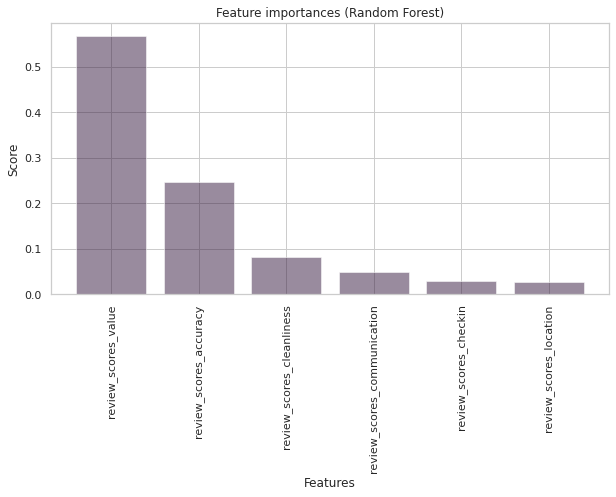

In [53]:
X = EDA_df[['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]
y = EDA_df[['review_scores_rating']]

model_random_forest(0.3,42,EDA_df,X,y)

## **Amenities**

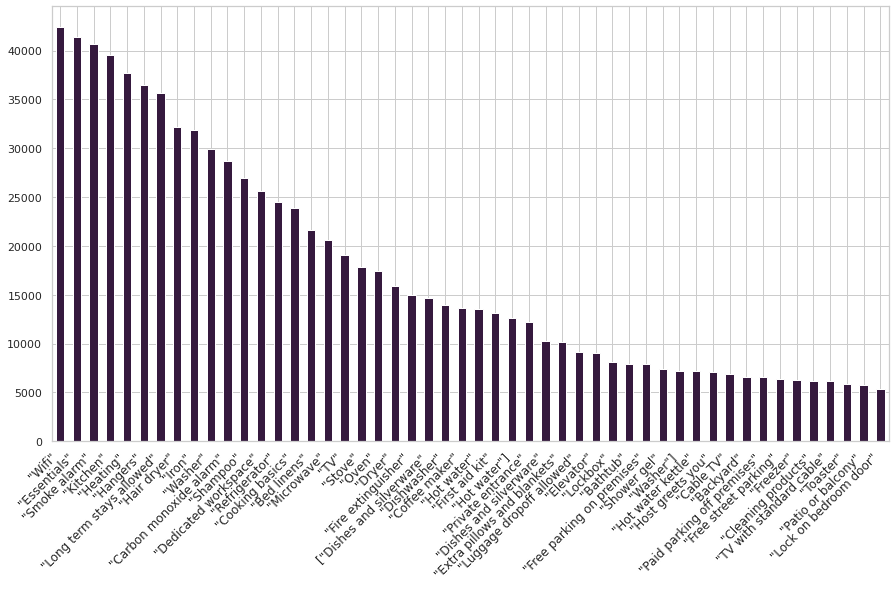

In [54]:
sns.set(font_scale = 1, palette="rocket",style="whitegrid",rc={"figure.figsize":(15, 8)})

pd.Series(np.concatenate(EDA_df['amenities'].map(lambda amns: amns.split(","))))\
    .value_counts().head(50)\
    .plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show();

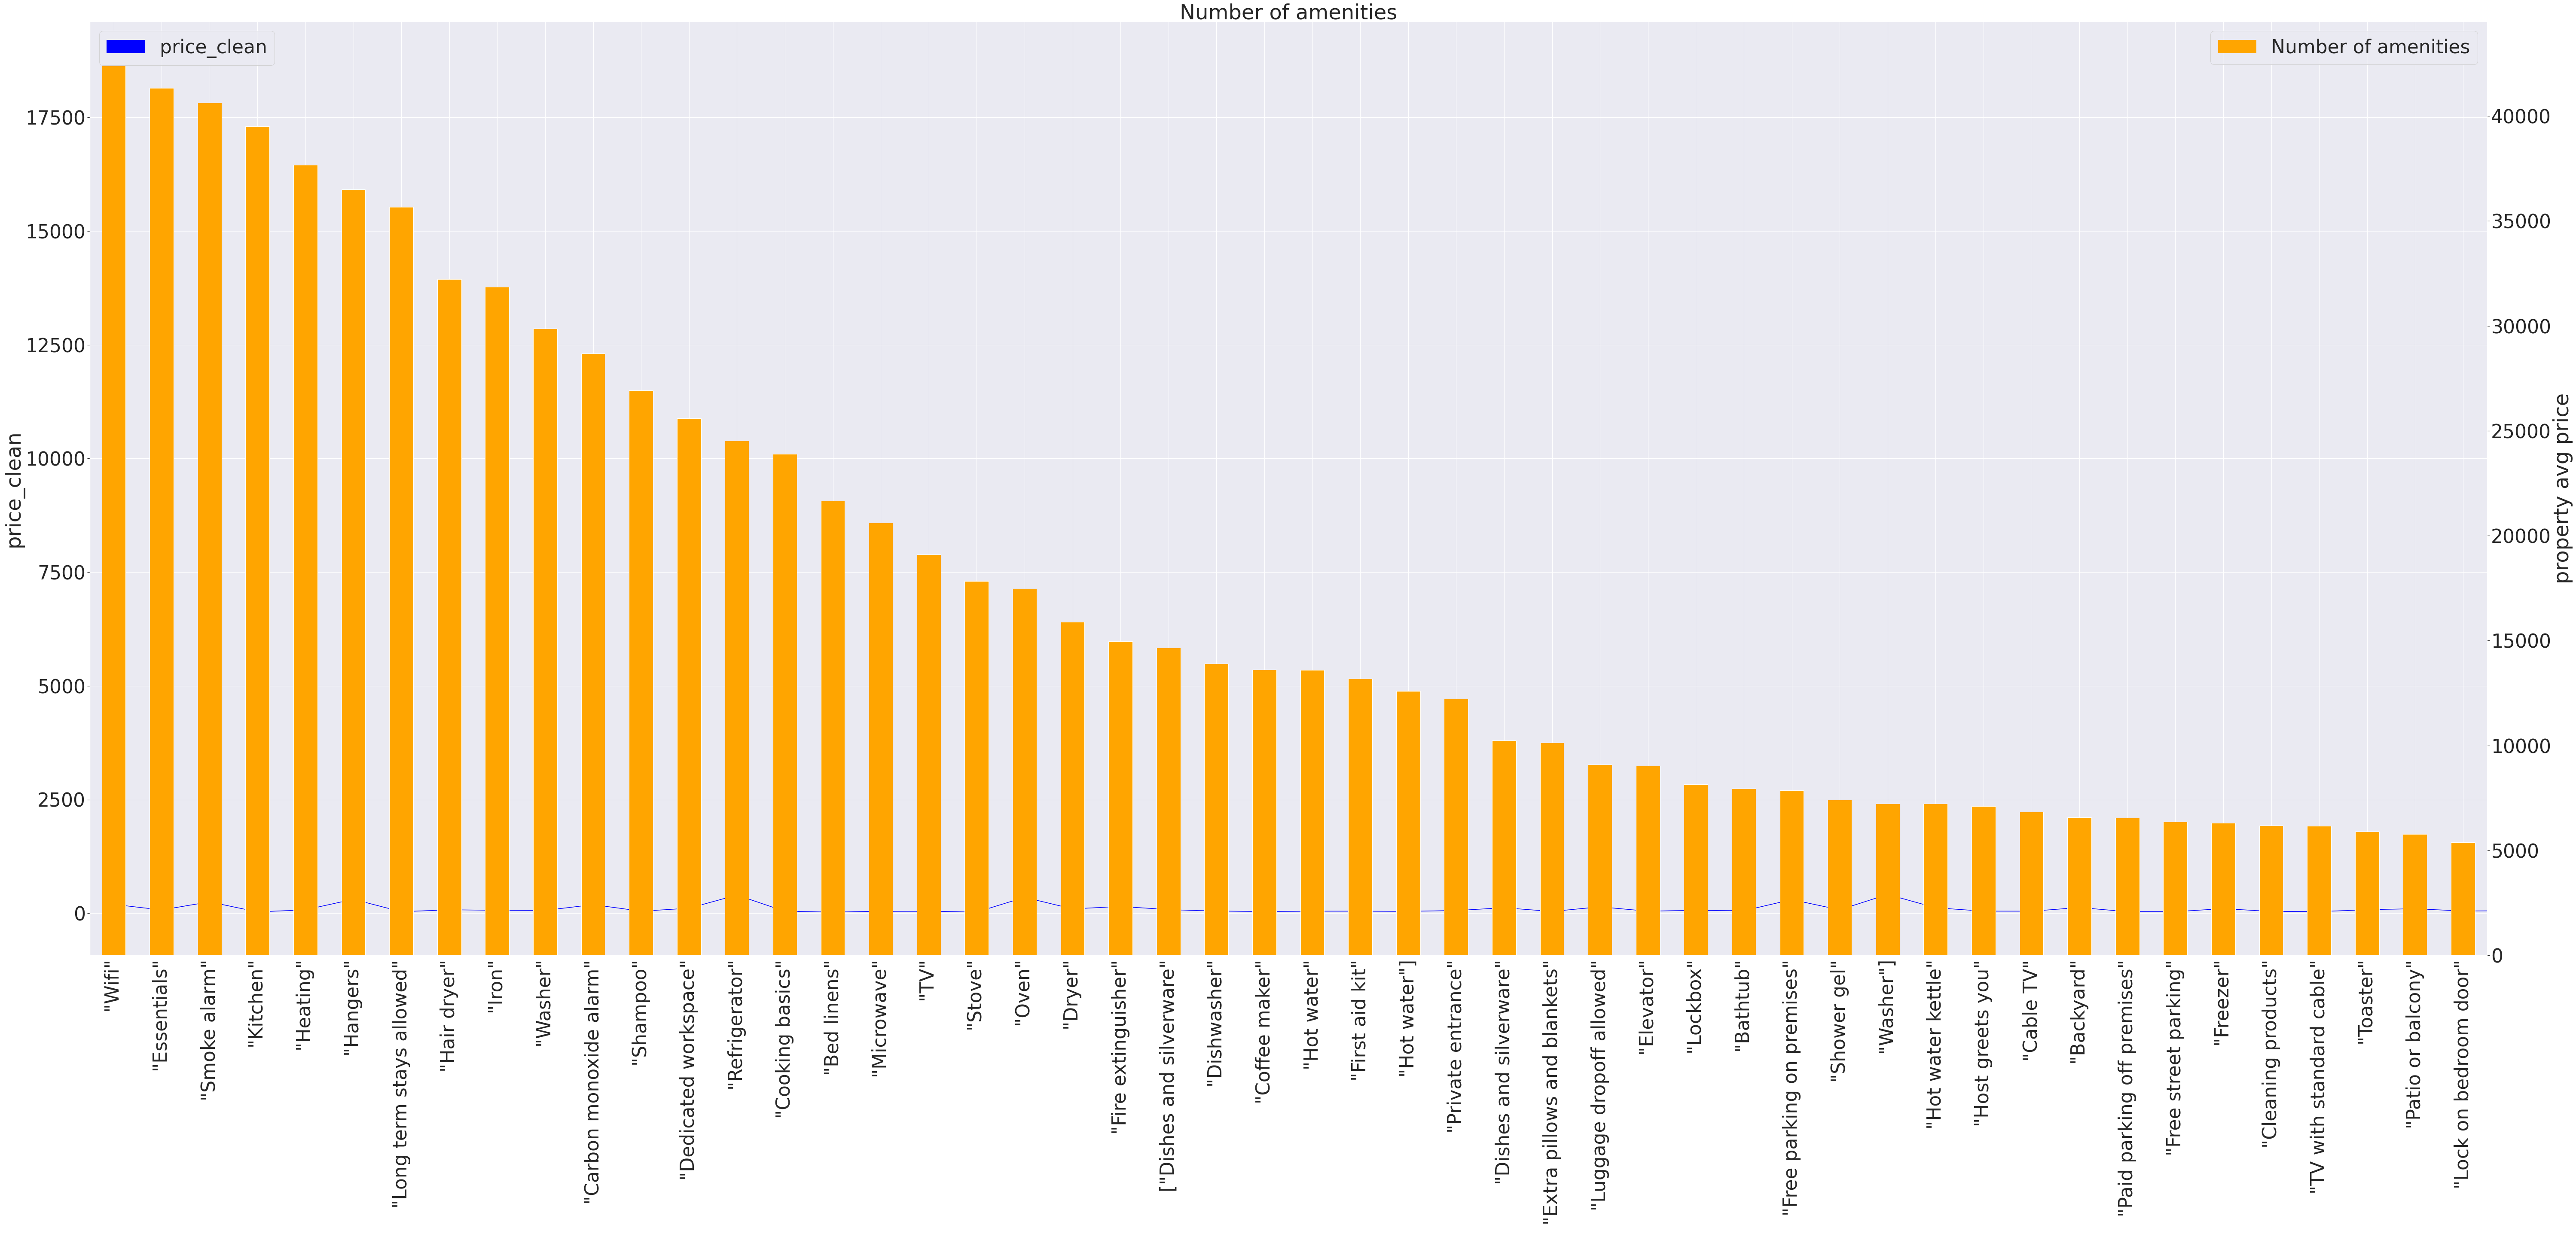

In [55]:
#plot the relationship between Boroughs and Property Price
sns.set(font_scale = 4,rc={"figure.figsize":(100, 40)})

# plot line graph on axis #1
ax1 = sns.lineplot(
    x=EDA_df.index, 
    y='price_clean', 
    data=EDA_df, 
    sort=False, 
    color='blue'
)
ax1.set_ylabel('price_clean')
#ax1.set_ylim(0, 1000)
ax1_patch = mpatches.Patch(color='blue', label='price_clean')
ax1.legend(handles=[ax1_patch], loc="upper left")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar graph on axis #2

pd.Series(np.concatenate(EDA_df['amenities'].map(lambda amns: amns.split(","))))\
    .value_counts().head(50)\
    .plot(kind='bar',color='orange')
ax2 = plt.gca()
ax2.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

ax2.grid(b=False) # turn off grid #2
ax2.set_ylabel('property avg price')
#ax2.set_ylim(0, 4000)
ax2_patch = mpatches.Patch(color='orange', label='Number of amenities')
ax2.legend(handles=[ax2_patch], loc="upper right")
ax2.set_title('Number of amenities')
plt.show()

In [56]:
amenities_df = EDA_df[['amenities_ Wifi',
 'amenities_ Essentials',
 'amenities_ Smoke alarm',
 'amenities_ Kitchen',
 'amenities_ Heating',
 'amenities_ Washer',
 'amenities_ Long term stays allowed',
 'amenities_ Hangers',
 'amenities_ Iron',
 'amenities_ Hair dryer',
 'price_clean']]

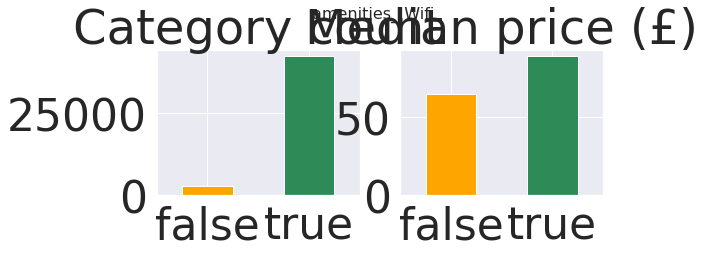

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
fig.suptitle("amenities_ Wifi", fontsize=16, y=1)
plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
amenities_df.groupby("amenities_ Wifi").size().plot(kind='bar', ax=ax1, color=['orange', 'seagreen'])
ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
ax1.set_title('Category count')
ax1.set_xlabel('')
amenities_df.groupby("amenities_ Wifi").price_clean.median().plot(kind='bar', ax=ax2, color=['orange', 'seagreen'])
ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
ax2.set_title('Median price (£)')
ax2.set_xlabel('')
plt.show()

Text(0.5, 0, '')

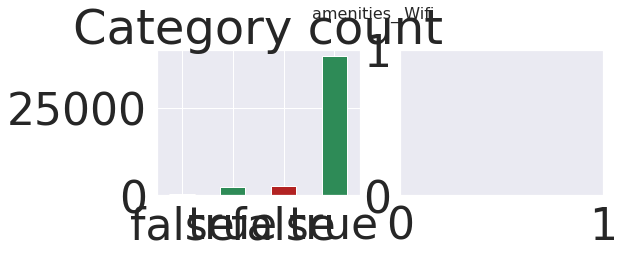

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
fig.suptitle("amenities_ Wifi", fontsize=16, y=1)
plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
amenities_df.groupby(["amenities_ Wifi","amenities_ Essentials"]).size().plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'])
ax1.set_xticklabels(labels=['false', 'true','false','true'], rotation=0)
ax1.set_title('Category count')
ax1.set_xlabel('')

In [59]:
#amenities_df.groupby(['amenities_ Wifi', 'amenities_ Essentials'])['price_clean'].mean()

## **Property worth = better value?**

In [60]:
EDA_property=EDA_df.groupby('Borough')[['price_clean', 'Property Index Price']].mean()
#EDA_property.set_index('Borough',inplace=True)
#EDA_property = EDA_crime_property.reset_index()

#correlation analysus
EDA_property[['Property Index Price','price_clean']].corr()

Property Index Price  price_clean
Property Index Price              1.000000     0.850179
price_clean                       0.850179     1.000000

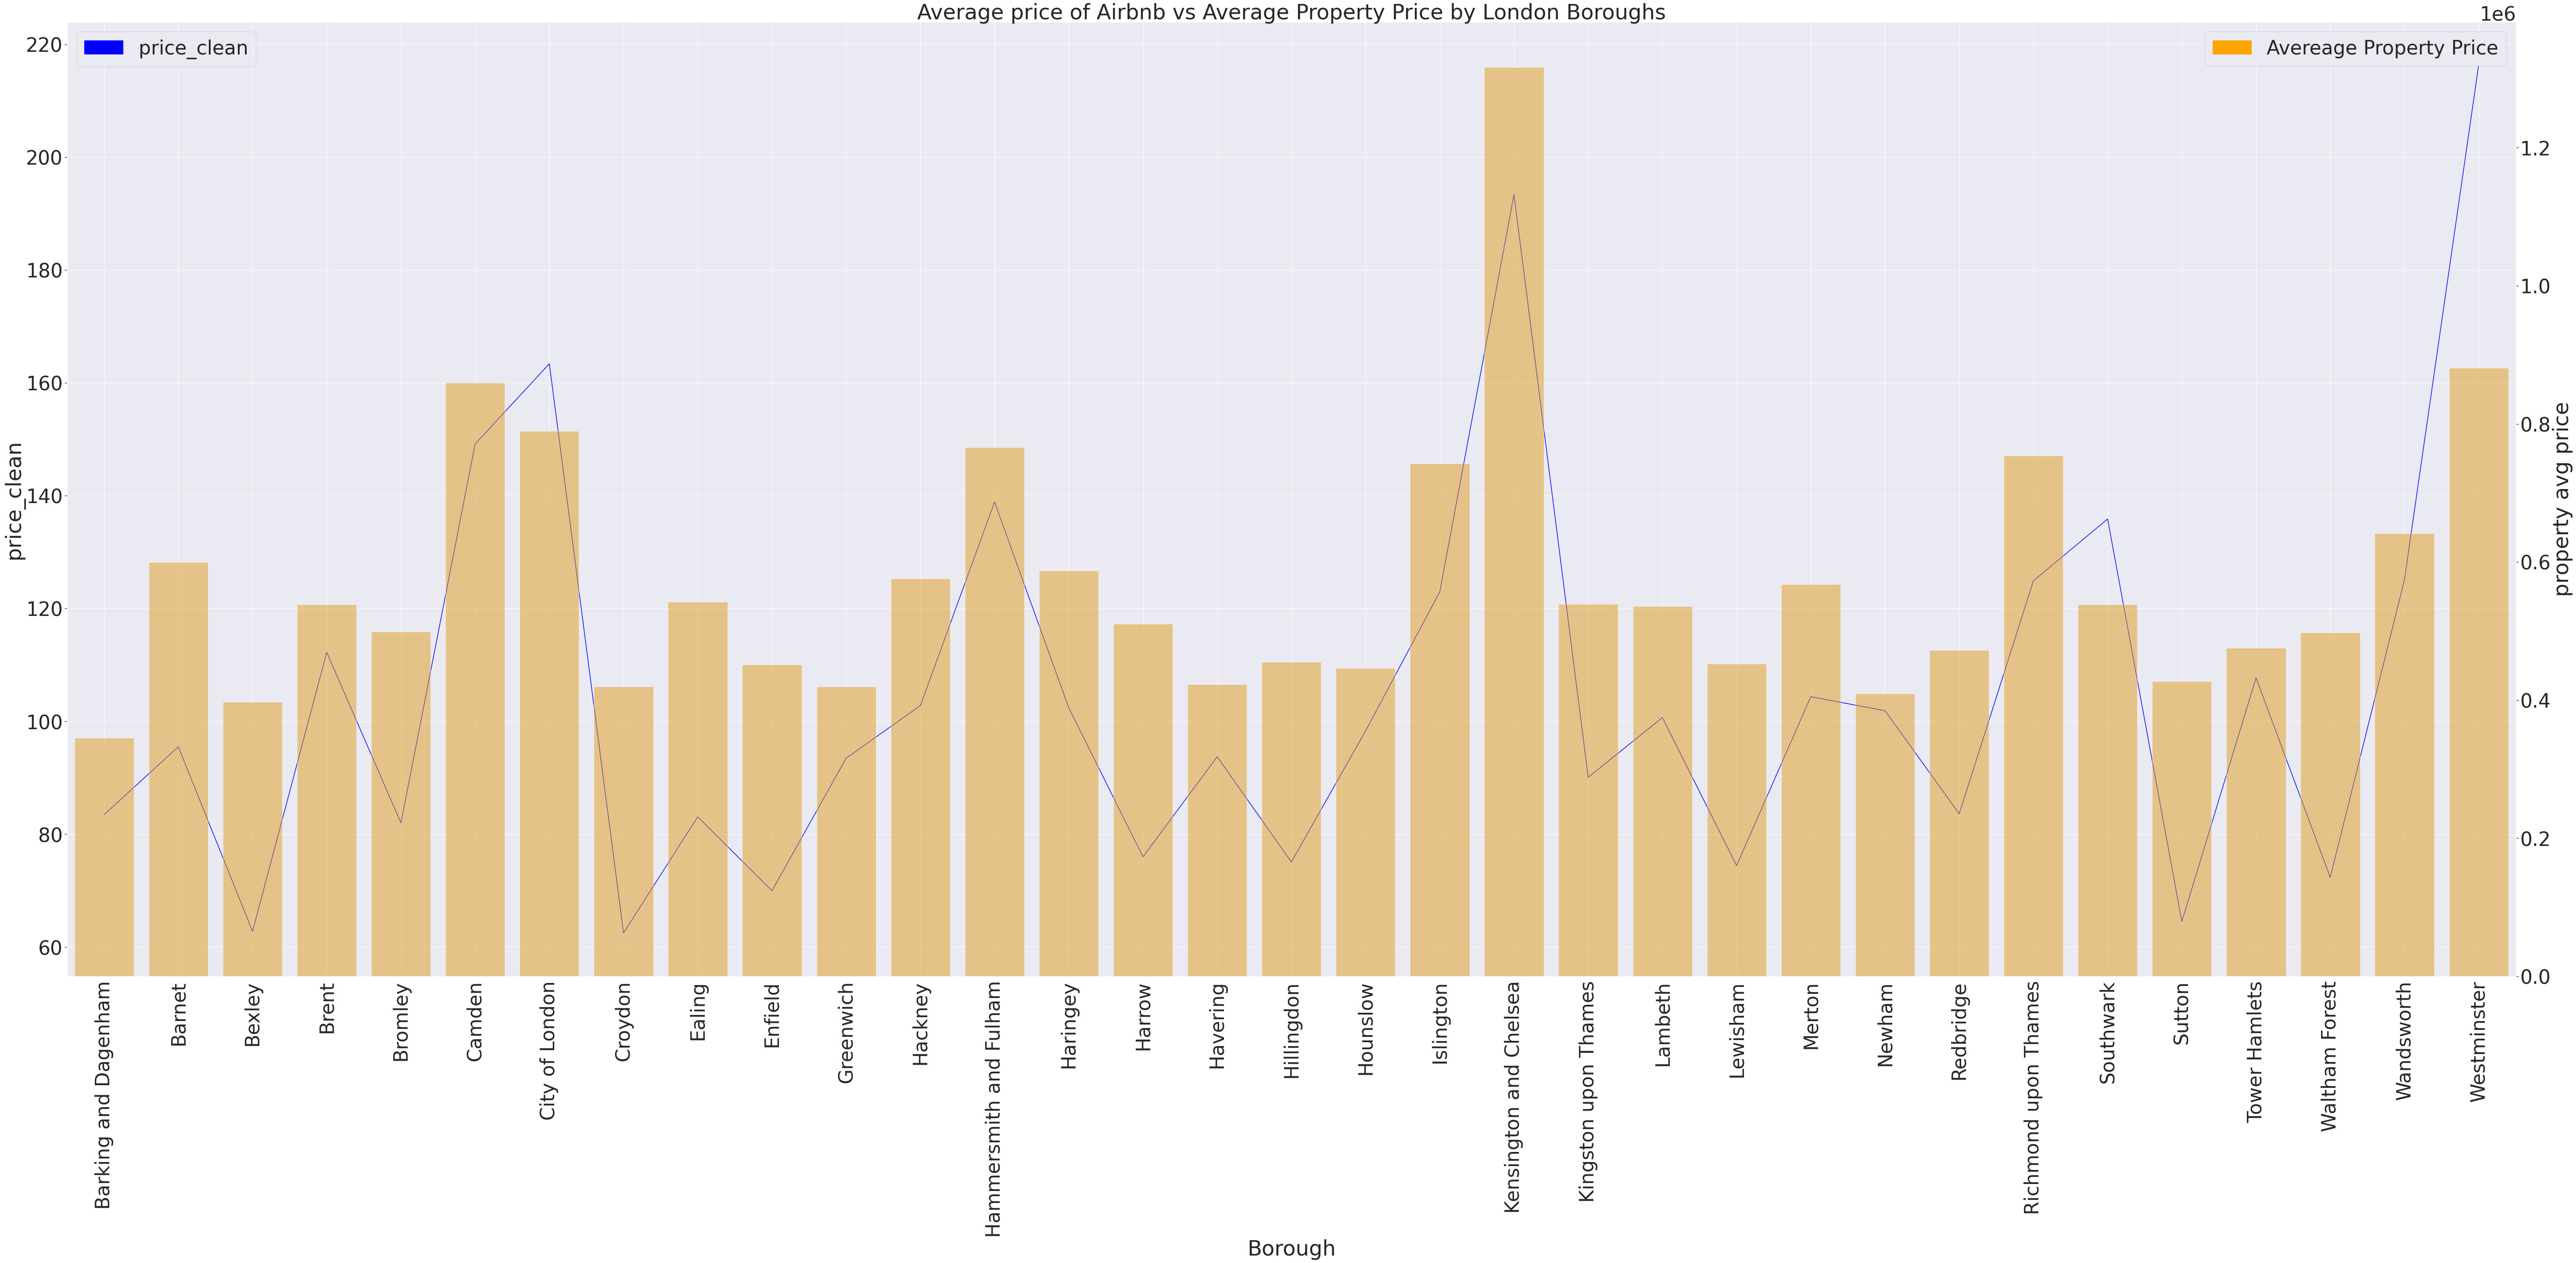

In [61]:
#plot the relationship between Boroughs and Property Price
sns.set(font_scale = 4,rc={"figure.figsize":(100, 40)})

# plot line graph on axis #1
ax1 = sns.lineplot(
    x=EDA_property.index, 
    y='price_clean', 
    data=EDA_property, 
    sort=False, 
    color='blue'
)
ax1.set_ylabel('price_clean')
#ax1.set_ylim(0, 1000)
ax1_patch = mpatches.Patch(color='blue', label='price_clean')
ax1.legend(handles=[ax1_patch], loc="upper left")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar graph on axis #2
sns.barplot(
    x=EDA_property.index, 
    y='Property Index Price', 
    data=EDA_property, 
    color='orange', 
    alpha=0.5, 
    ax = ax2       # Pre-existing axes for the plot
)
ax2.grid(b=False) # turn off grid #2
ax2.set_ylabel('property avg price')
#ax2.set_ylim(0, 4000)
ax2_patch = mpatches.Patch(color='orange', label='Avereage Property Price')
ax2.legend(handles=[ax2_patch], loc="upper right")
ax2.set_title('Average price of Airbnb vs Average Property Price by London Boroughs')
plt.show()

## **Higher Crime = Lower Airbnb Price ?**

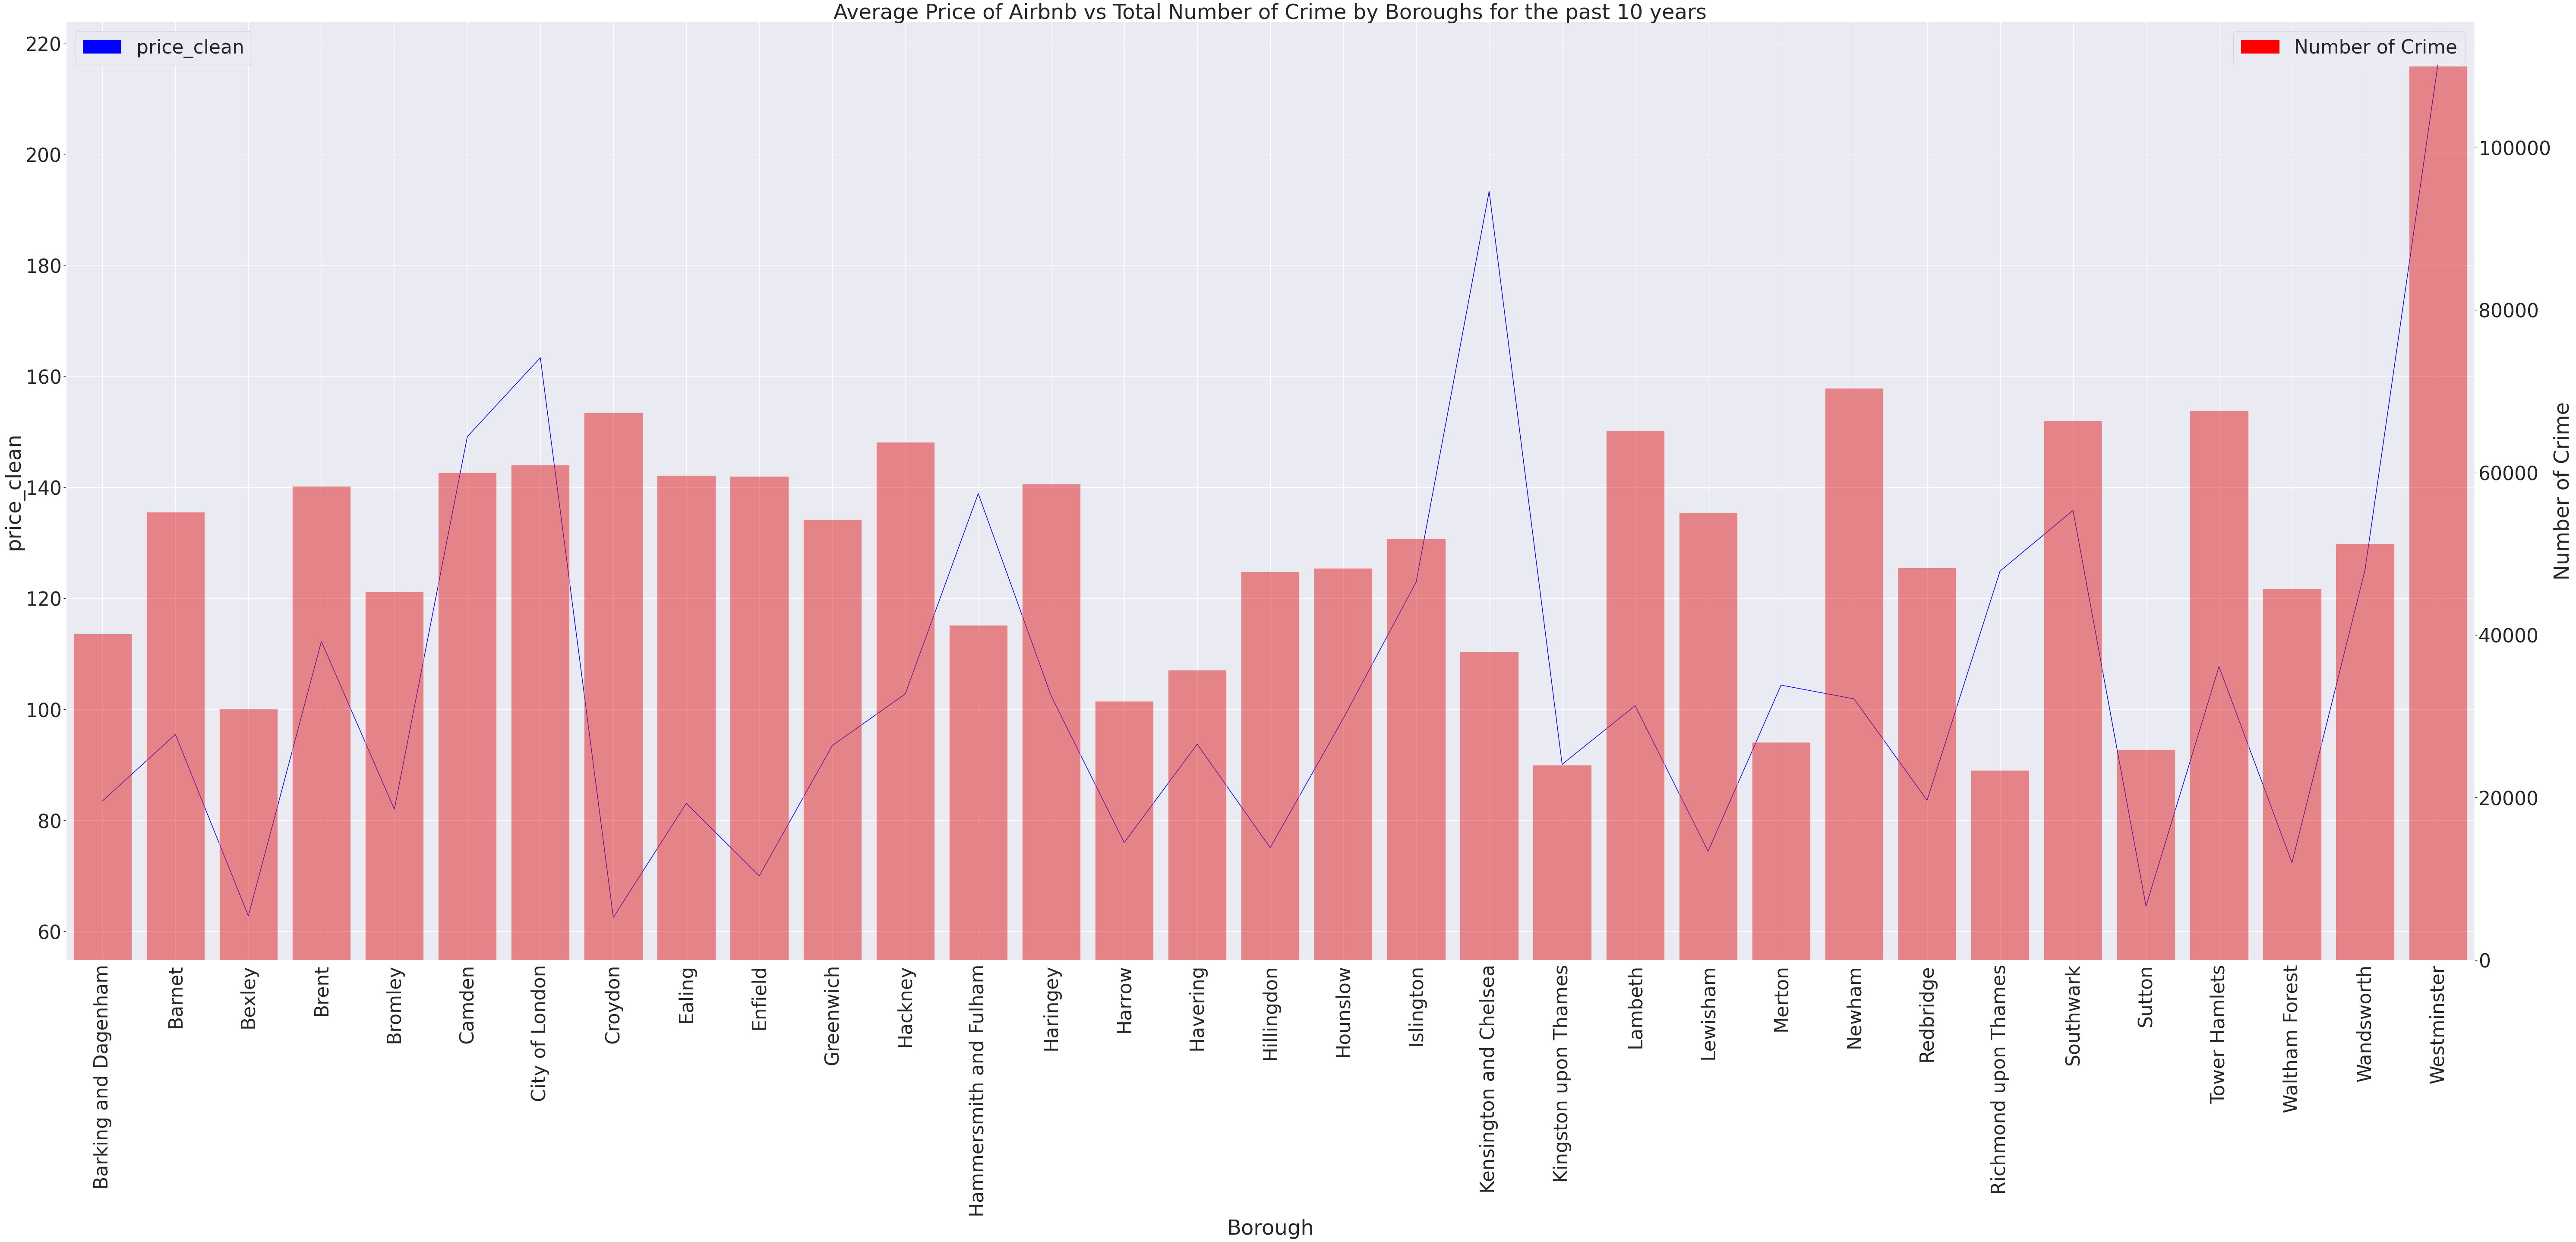

In [62]:
EDA_crime=EDA_df.groupby('Borough')[['price_clean', 'crime']].mean()

#plot the relationship between Boroughs and Property Price
sns.set(font_scale = 4,rc={"figure.figsize":(100, 40)})

# plot line graph on axis #1
ax1 = sns.lineplot(
    x=EDA_crime.index, 
    y='price_clean', 
    data=EDA_crime, 
    sort=False, 
    color='blue'
)
ax1.set_ylabel('price_clean')
#ax1.set_ylim(0, 1000)
ax1_patch = mpatches.Patch(color='blue', label='price_clean')
ax1.legend(handles=[ax1_patch], loc="upper left")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar graph on axis #2
sns.barplot(
    x=EDA_crime.index, 
    y='crime', 
    data=EDA_crime, 
    color='red', 
    alpha=0.5, 
    ax = ax2       # Pre-existing axes for the plot
)
ax2.grid(b=False) # turn off grid #2
ax2.set_ylabel('Number of Crime')
#ax2.set_ylim(0, 4000)
ax2_patch = mpatches.Patch(color='red', label='Number of Crime')
ax2.legend(handles=[ax2_patch], loc="upper right")
ax2.set_title('Average Price of Airbnb vs Total Number of Crime by Boroughs for the past 10 years')
plt.show()

In [63]:
#correlation analysus
EDA_crime[['crime','price_clean']].corr()

crime  price_clean
crime        1.000000     0.412396
price_clean  0.412396     1.000000

# **Prepping dataset for modelling**

### **Outliers Removal**

In [64]:
prep_data=EDA_df.copy()

fig = px.box(prep_data, y="price_clean",width=600, height=600)
fig.update_layout(title_text="'Price boxplot")
fig.show()

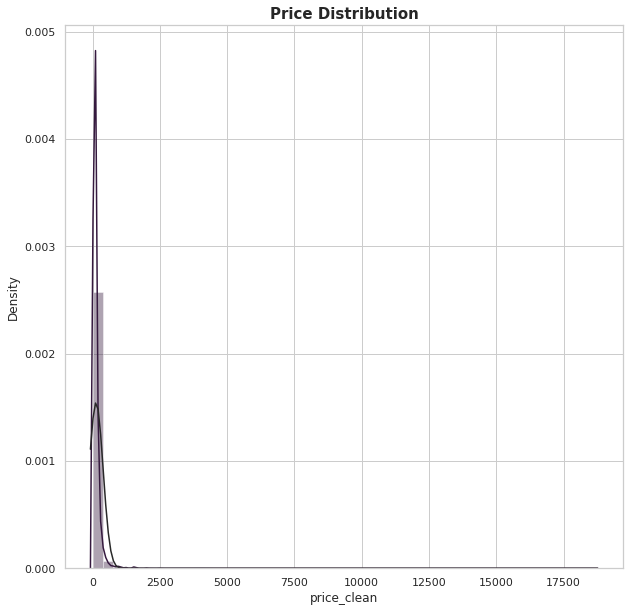

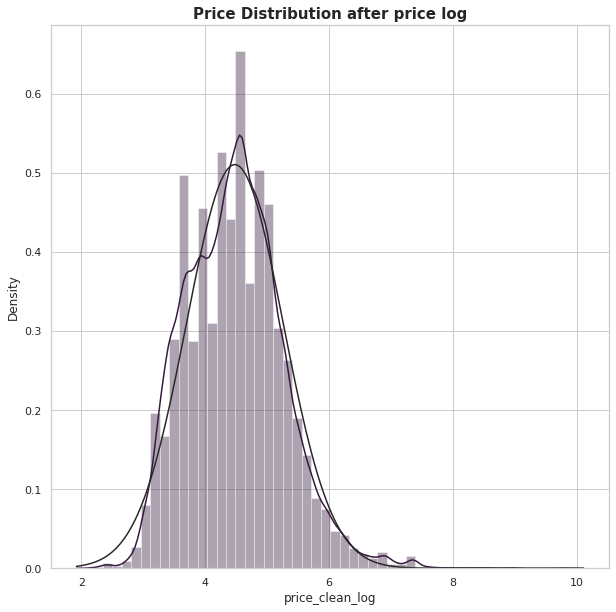

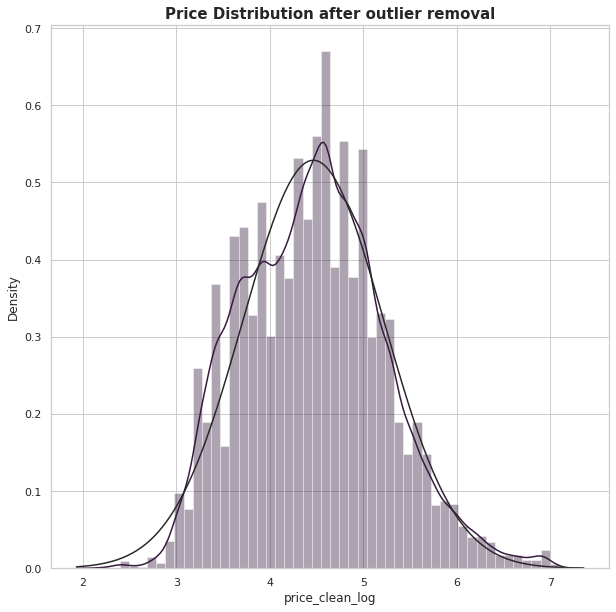

In [65]:
from scipy.stats import norm
sns.set(font_scale = 1, palette="rocket",style="whitegrid",rc={"figure.figsize":(15, 8)})

def plot_distribution(data,column,title):
  plt.figure(figsize=(10,10))
  sns.distplot(data[column], fit=norm)
  plt.title(title,size=15, weight='bold')

def outlier_removal(dataset,column):
  first_quartile = dataset[column].describe()['25%']
  third_quartile = dataset[column].describe()['75%']
  interquartile_range = third_quartile-first_quartile
  outliers_removed_df = dataset[(dataset[column]<(first_quartile+3*interquartile_range))]
  return outliers_removed_df

#Experiment 1 - - the chosen method
outlier_transform_1=prep_data.copy()
#plot distribution before outliers removal
plot_distribution(outlier_transform_1,'price_clean','Price Distribution')

#log price (transform)
outlier_transform_1['price_clean_log'] = np.log(outlier_transform_1.price_clean+1)

#plot distribution after log price
plot_distribution(outlier_transform_1,'price_clean_log','Price Distribution after price log')

#remove outliers
outliers_removed_df_1=outlier_removal(outlier_transform_1,'price_clean_log') 

#plot distribution after outliers removal
plot_distribution(outliers_removed_df_1,'price_clean_log','Price Distribution after outlier removal') 



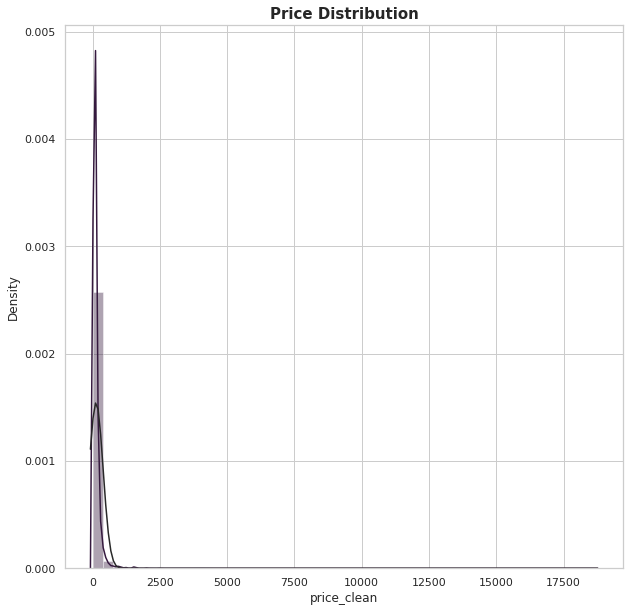

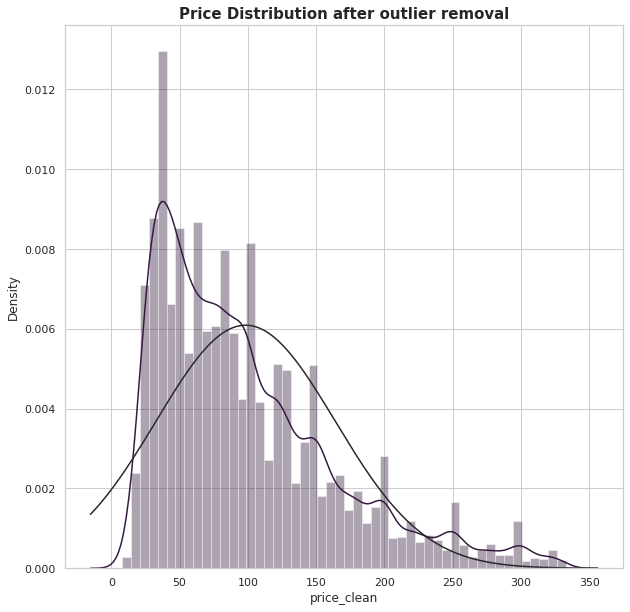

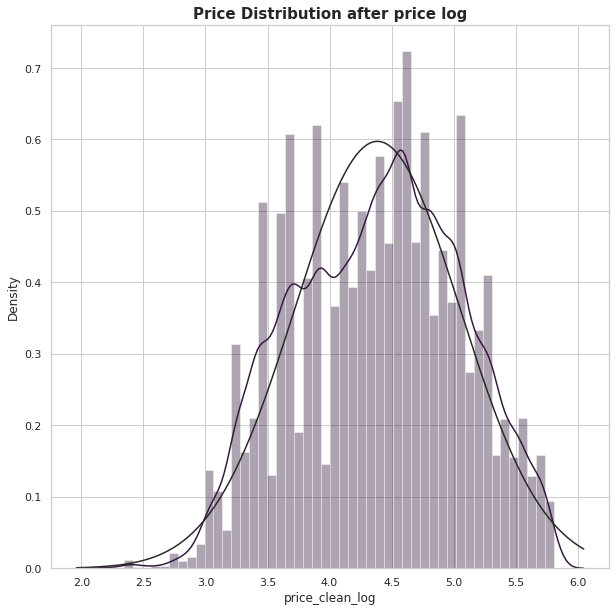

In [66]:
#Experiment 2 
outlier_transform_2=prep_data.copy()

#plot distribution before outliers removal
plot_distribution(outlier_transform_2,'price_clean','Price Distribution')

#remove outliers
outlier_transform_2=outlier_removal(outlier_transform_2,'price_clean') 

#plot distribution after outliers removal
plot_distribution(outlier_transform_2,'price_clean','Price Distribution after outlier removal') 

#log price
outlier_transform_2['price_clean_log'] = np.log(outlier_transform_2.price_clean+1)

#plot distribution after log price
plot_distribution(outlier_transform_2,'price_clean_log','Price Distribution after price log')



In [67]:
#Since the first approach is better
cleaned_df=outliers_removed_df_1.copy()

fig = px.box(cleaned_df, y="price_clean_log",width=600, height=600)
fig.update_layout(title_text="'Price boxplot")
fig.show()

## **Transform Categorical Data to Numerical**

In [68]:
# get all categorical columns in the dataframe

to_remove=['neighborhood_overview','id','listing_url','name','description','picture_url','host_about','host_id','price_clean']
numeric_data=remove_columns(cleaned_df,to_remove)
numeric_data['Review_scores_rating_category'] = cleaned_df.Review_scores_rating_category.astype(str)

In [69]:
# get all categorical columns in the dataframe
catCols = [col for col in numeric_data.columns if numeric_data[col].dtype=="O"]

#onehotencoding
lb_make = LabelEncoder()

for item in catCols:
    numeric_data[item] = lb_make.fit_transform(numeric_data[item])

In [70]:
numeric_data.head()

Borough  host_location  host_response_time  host_response_rate  \
0       26           1492                   2          100.000000   
1       13           1082                   2          100.000000   
2       31            708                   3           92.816391   
3        1           1082                   3           92.816391   
4       19            906                   2          100.000000   

   host_acceptance_rate  host_is_superhost  host_neighbourhood  \
0              95.00000                  1                 201   
1              98.00000                  1                 191   
2               0.00000                  0                  16   
3              78.49825                  0                 181   
4              43.00000                  0                  59   

   host_has_profile_pic  host_identity_verified  latitude  longitude  \
0                     1                       1  51.48085   -0.28086   
1                     1                       1  51.58478   -0.16057   
2                     1                       1  51.47119   -0.16256   
3                     1                       1  51.57438   -0.21081   
4                     1                       1  51.48780   -0.16813   

   property_type  room_type  accommodates  bathrooms_text  bedrooms  beds  \
0             21          0             5               5       3.0   3.0   
1             52          2             2               1       1.0   1.0   
2             21          0             4               5       1.0   1.0   
3             52          2             2               6       1.0   1.0   
4             18          0             2               2       1.0   1.0   

   amenities  minimum_nights  maximum_nights  number_of_reviews  \
0      12206               3              22                 89   
1       6784               2             365                550   
2      10666               3            1125                 93   
3       4722              10            1120                129   
4       8000               3              50                 89   

   number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  \
0                     10                       2                  4.82   
1                     22                       1                  4.85   
2                      0                       0                  4.89   
3                      0                       0                  4.78   
4                      0                       0                  4.79   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    4.82                       4.80                   4.94   
1                    4.87                       4.84                   4.95   
2                    4.88                       4.92                   4.89   
3                    4.70                       4.94                   4.91   
4                    4.84                       4.88                   4.87   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         4.96                    4.90                 4.63   
1                         4.96                    4.77                 4.85   
2                         4.93                    4.58                 4.64   
3                         4.89                    4.45                 4.74   
4                         4.82                    4.93                 4.73   

   instant_bookable  calculated_host_listings_count  \
0                 0                               1   
1                 1                               2   
2                 0                               1   
3                 1                               3   
4                 0                               1   

   calculated_host_listings_count_entire_homes  \
0                                            1   
1                                            0   
2               

## **Feature Scaling - Standardisation**

In [71]:
def standardise_variable(dataset, variables):
    standard_data = dataset.copy()

    # We apply the standard scaler to values of the variables that are inputted
    ss = StandardScaler()
    norm_data = ss.fit_transform(standard_data[variables].values)
    standard_data[to_normalise] = norm_data
    
    return standard_data

In [72]:
"""
#standardised non binary data
from pandas.testing import assert_frame_equal
from sklearn.preprocessing import StandardScaler

standardised_data = numeric_data.copy()

to_standardised= ['host_response_rate', 'host_acceptance_rate', 'latitude', 'longitude', 'bedrooms', 'beds', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'price_clean_log']
ss = StandardScaler()
norm_data = ss.fit_transform(standardised_data[to_standardised].values)
standardised_data[to_standardised] = norm_data

"""

"\n#standardised non binary data\nfrom pandas.testing import assert_frame_equal\nfrom sklearn.preprocessing import StandardScaler\n\nstandardised_data = numeric_data.copy()\n\nto_standardised= ['host_response_rate', 'host_acceptance_rate', 'latitude', 'longitude', 'bedrooms', 'beds', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'price_clean_log']\nss = StandardScaler()\nnorm_data = ss.fit_transform(standardised_data[to_standardised].values)\nstandardised_data[to_standardised] = norm_data\n\n"

## **Feature Scaling - Normalisation**

In [73]:
normalised_data = numeric_data.copy()

mmscaler = MinMaxScaler()
cols = list(normalised_data.columns)
normalised_data[cols] = mmscaler.fit_transform(normalised_data[cols])

In [74]:
normalised_data.head()

Borough  host_location  host_response_time  host_response_rate  \
0  0.81250       0.731731            0.666667            1.000000   
1  0.40625       0.530652            0.666667            1.000000   
2  0.96875       0.347229            1.000000            0.928164   
3  0.03125       0.530652            1.000000            0.928164   
4  0.59375       0.444335            0.666667            1.000000   

   host_acceptance_rate  host_is_superhost  host_neighbourhood  \
0              0.950000                1.0            0.450673   
1              0.980000                1.0            0.428251   
2              0.000000                0.0            0.035874   
3              0.784983                0.0            0.405830   
4              0.430000                0.0            0.132287   

   host_has_profile_pic  host_identity_verified  latitude  longitude  \
0                   1.0                     1.0  0.482149   0.287518   
1                   1.0                     1.0  0.745496   0.438027   
2                   1.0                     1.0  0.457671   0.435537   
3                   1.0                     1.0  0.719144   0.375166   
4                   1.0                     1.0  0.499759   0.428568   

   property_type  room_type  accommodates  bathrooms_text  bedrooms      beds  \
0       0.230769   0.000000      0.266667        0.119048  0.136364  0.033898   
1       0.571429   0.666667      0.066667        0.023810  0.045455  0.000000   
2       0.230769   0.000000      0.200000        0.119048  0.045455  0.000000   
3       0.571429   0.666667      0.066667        0.142857  0.045455  0.000000   
4       0.197802   0.000000      0.066667        0.047619  0.045455  0.000000   

   amenities  minimum_nights  maximum_nights  number_of_reviews  \
0   0.292058        0.001781    2.100000e-08           0.083412   
1   0.162324        0.000890    3.640000e-07           0.520379   
2   0.255210        0.001781    1.124000e-06           0.087204   
3   0.112985        0.008014    1.119000e-06           0.121327   
4   0.191420        0.001781    4.900000e-08           0.083412   

   number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  \
0               0.013717                0.019048                 0.964   
1               0.030178                0.009524                 0.970   
2               0.000000                0.000000                 0.978   
3               0.000000                0.000000                 0.956   
4               0.000000                0.000000                 0.958   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                   0.964                      0.960                  0.988   
1                   0.974                      0.968                  0.990   
2                   0.976                      0.984                  0.978   
3                   0.940                      0.988                  0.982   
4                   0.968                      0.976                  0.974   

   review_scores_communication  review_scores_location  review_scores_value  \
0                        0.992                   0.980                0.926   
1                        0.992                   0.954                0.970   
2                        0.986                   0.916                0.928   
3                        0.978                   0.890                0.948   
4                        0.964                   0.986                0.946   

   instant_bookable  calculated_host_listings_count  \
0               0.0                        0.000000   
1               1.0                        0.001185   
2               0.0                        0.000000   
3               1.0                        0.002370   
4               0.0                        0.000000   

   calculated_host_listings_count_entire_homes  \
0                                     0.001183   
1                                     0.00

# **Correlation Analysis**

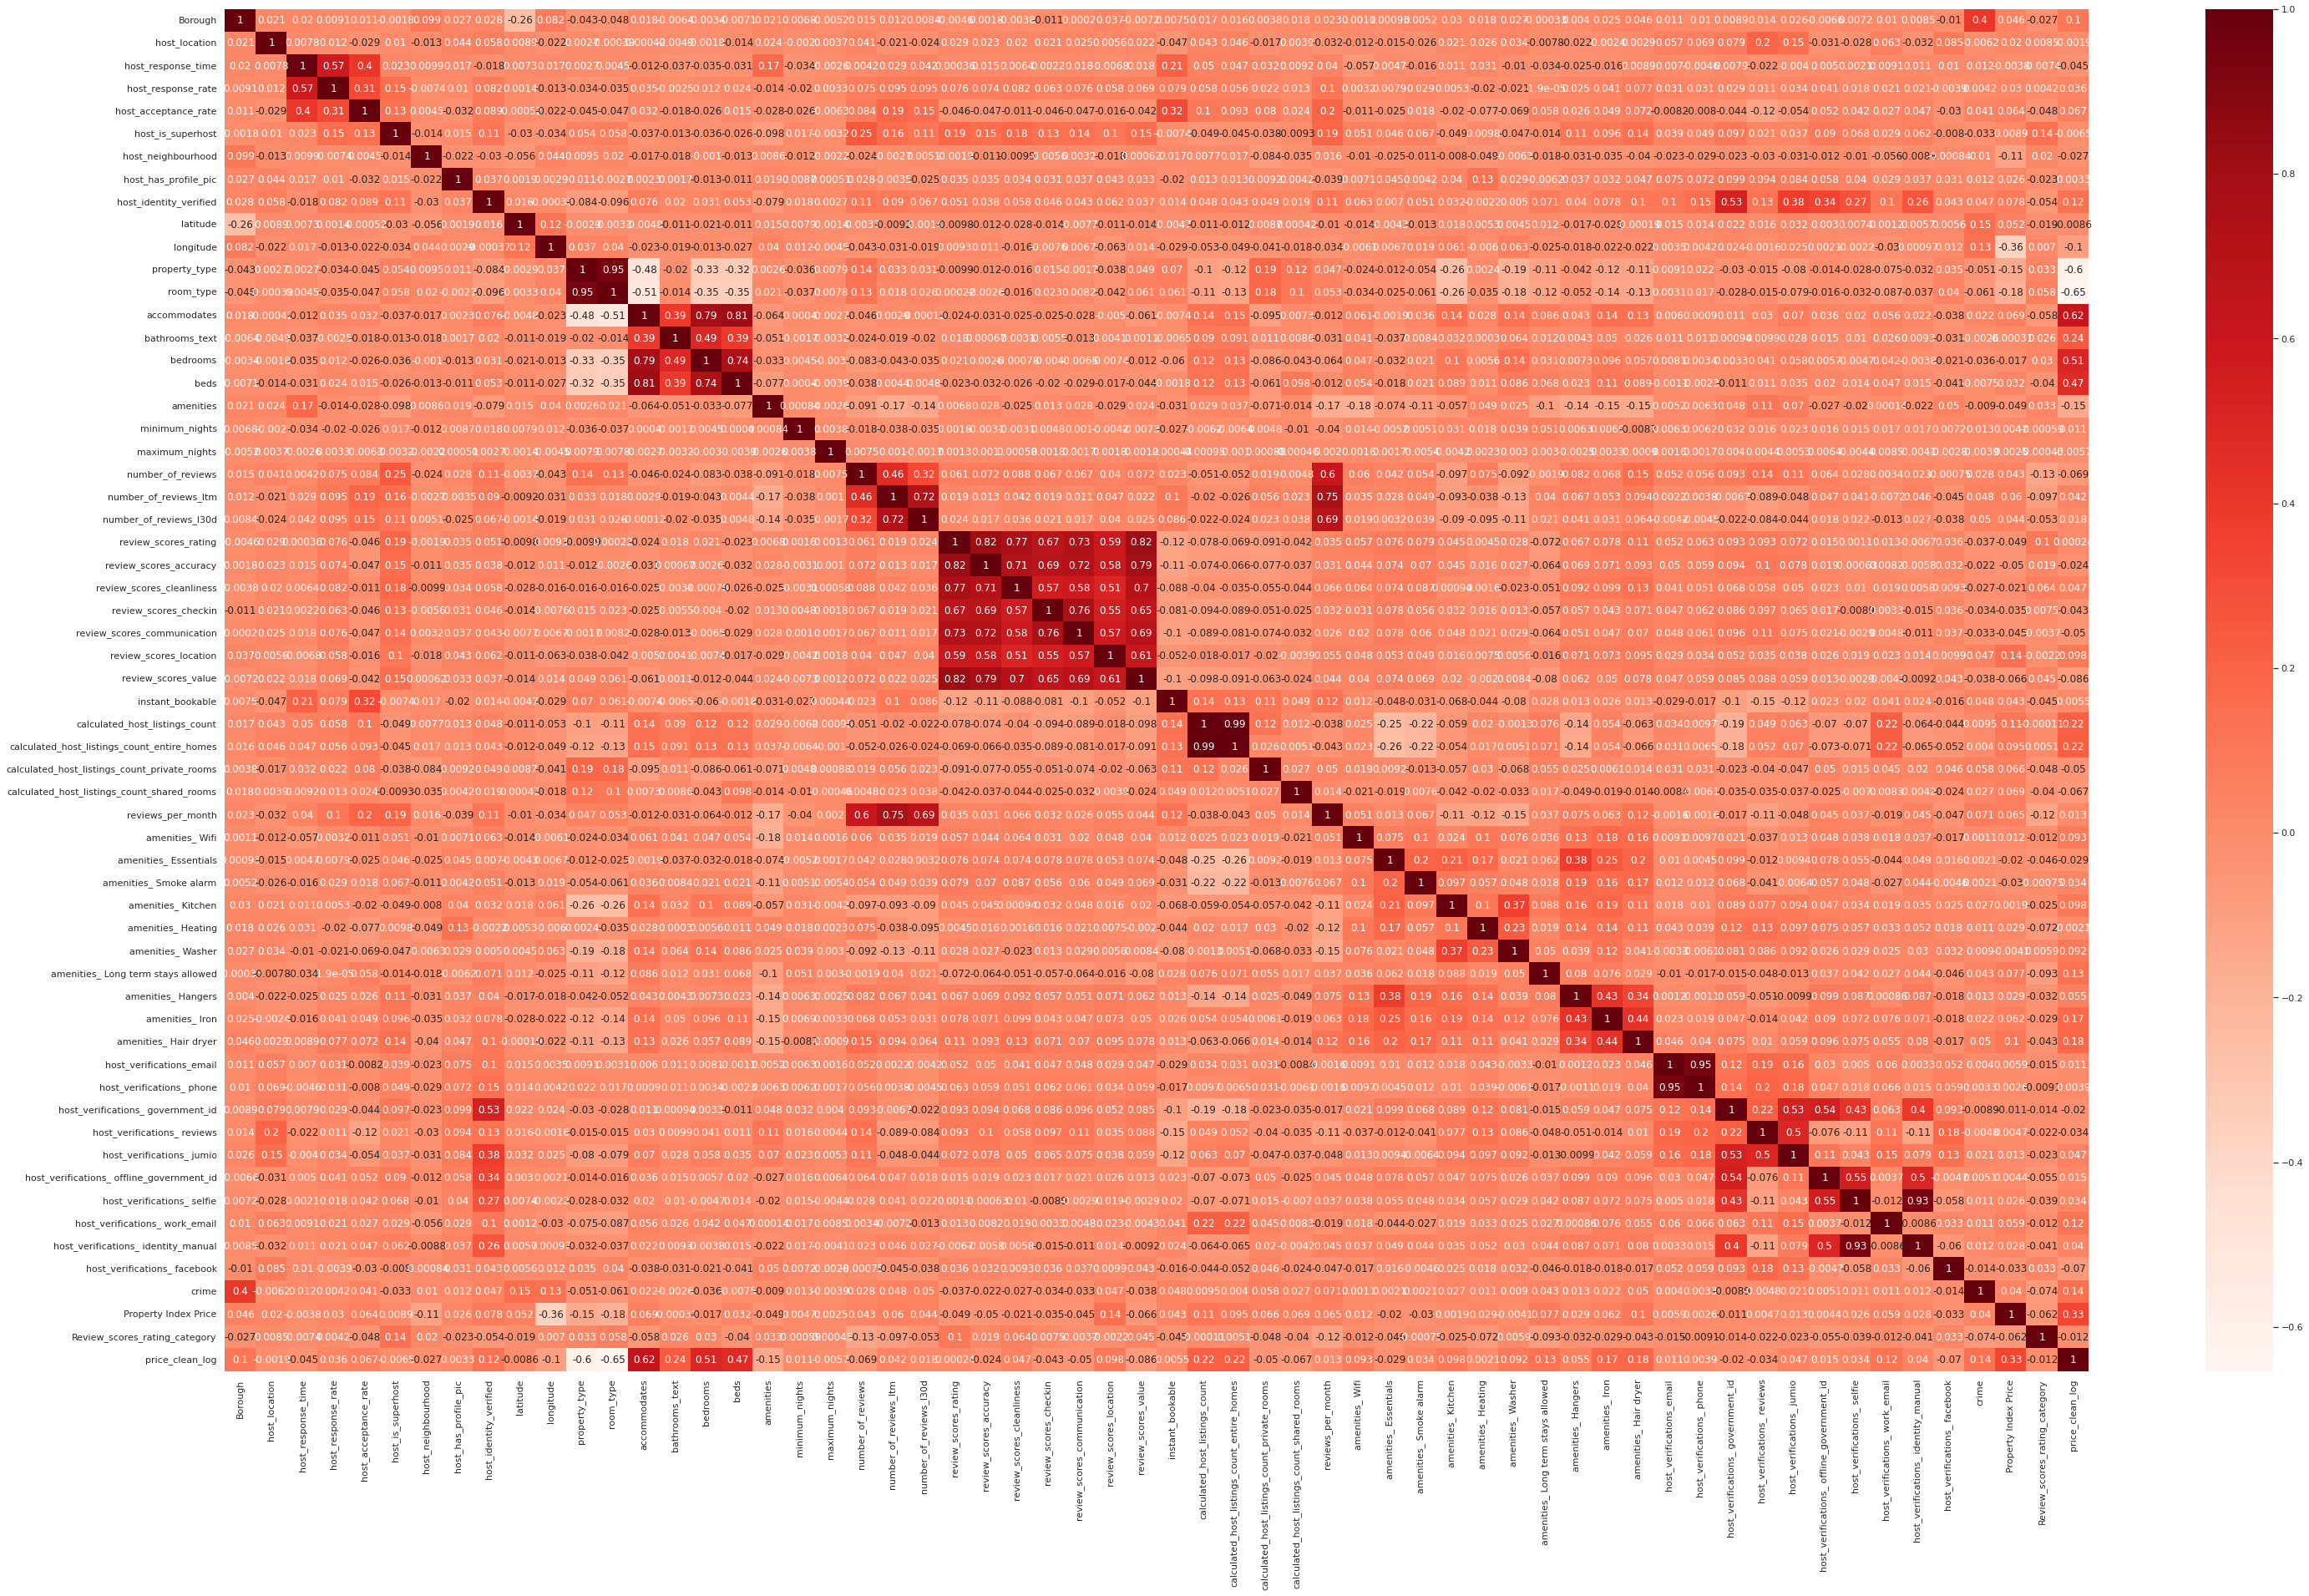

In [75]:
#Using Pearson Correlation
plt.figure(figsize=(50,30))
cor = normalised_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## **Dealing with multi-collinearity**

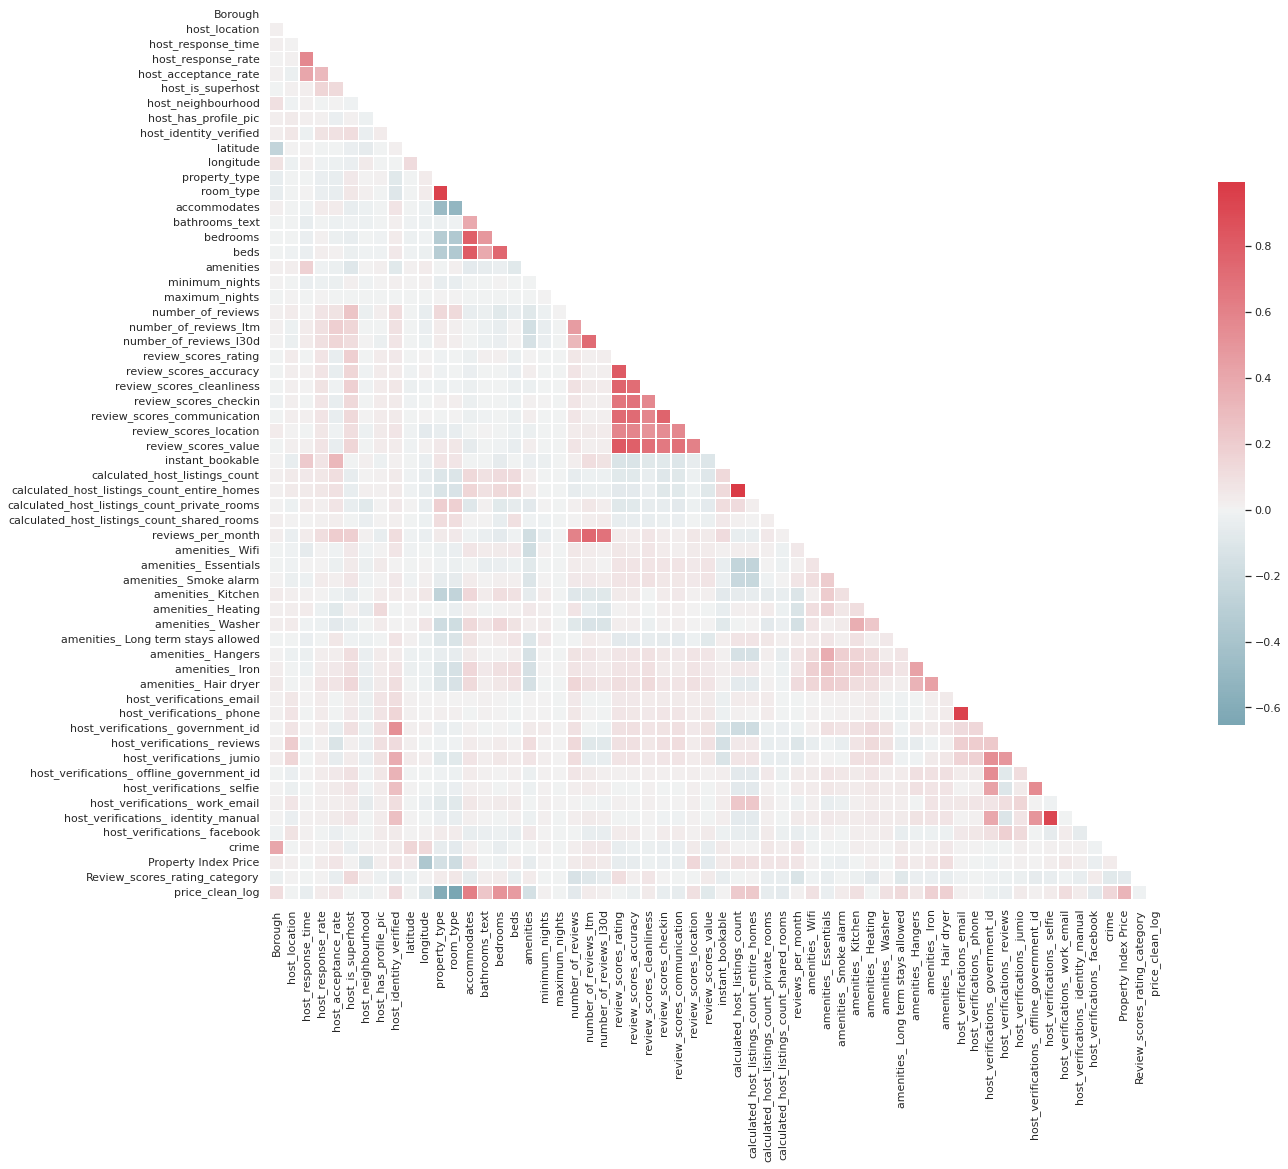

In [76]:
def multi_collinearity_heatmap(df, figsize=(11,9)):
  
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max())
    
  
multi_collinearity_heatmap(normalised_data, figsize=(20,20))

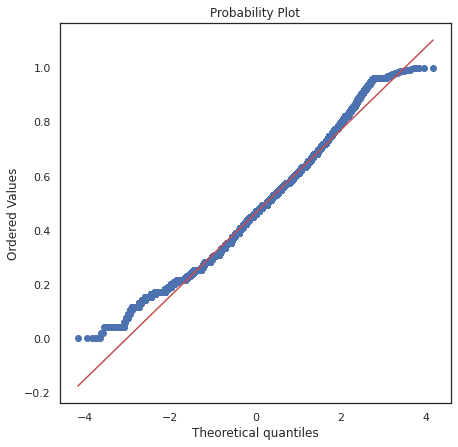

In [77]:
#in the following graph, the good fit indicates that normality is a reasonable approximation
from scipy import stats
plt.figure(figsize=(7,7))
stats.probplot(normalised_data['price_clean_log'],plot=plt)
plt.show()

In [78]:
feature_select=normalised_data.copy()

# **Prediction Models (XGBoost)**

In [190]:
import time
import xgboost as xgb
import sklearn
from xgboost import plot_importance
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error #metrics

def run_xgboost(X_train, X_test, Y_train, Y_test):
  xgb_reg_start = time.time()
  xgb_reg = xgb.XGBRegressor()
  xgb_reg.fit(X_train, Y_train)
  training_preds_xgb_reg = xgb_reg.predict(X_train)
  val_preds_xgb_reg = xgb_reg.predict(X_test)
  xgb_reg_end = time.time()

  print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
  print("\nTraining MSE:", round(mean_squared_error(Y_train, training_preds_xgb_reg),4))
  print("Validation MSE:", round(mean_squared_error(Y_test, val_preds_xgb_reg),4))
  print("\nTraining r2:", round(r2_score(Y_train, training_preds_xgb_reg),4))
  print("Validation r2:", round(r2_score(Y_test, val_preds_xgb_reg),4))

  #get feature importances from the model
  headers = ["name", "score"]
  values = sorted(zip(X_train.columns, xgb_reg.feature_importances_), key=lambda x: x[1] * -1)
  xgb_feature_importances = pd.DataFrame(values, columns = headers)

  #plot feature importances for top 15 features
  features = xgb_feature_importances['name'][:15]
  y_pos = np.arange(len(features))
  scores = xgb_feature_importances['score'][:15]
  
  plt.figure(figsize=(10,5))
  plt.bar(y_pos, scores, align='center', alpha=0.5)
  plt.xticks(y_pos, features, rotation='vertical')
  plt.ylabel('Score')
  plt.xlabel('Features')
  plt.title('Feature importances (XGBoost)')

  plt.savefig('feature importances XGB.png')
  
  plt.show()

## **Features: Airbnb Data Listing**

[01:23:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Time taken to run: 0.1 minutes

Training MSE: 0.0063
Validation MSE: 0.0067

Training r2: 0.736
Validation r2: 0.718


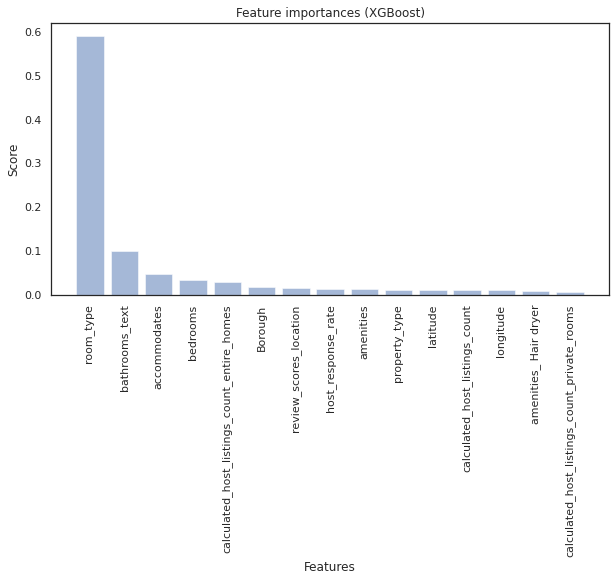

In [235]:
#run baseline model -

baseline_model=feature_select.copy()

X = baseline_model.drop(columns = ['price_clean_log','Property Index Price','Review_scores_rating_category','crime'])
Y = baseline_model['price_clean_log']

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.20, random_state = 5)

run_xgboost(X_train, X_test, Y_train, Y_test)

## **Features: Airbnb Data Listing + Review sentiment scores**

[01:23:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Time taken to run: 0.1 minutes

Training MSE: 0.0063
Validation MSE: 0.0067

Training r2: 0.7361
Validation r2: 0.7186


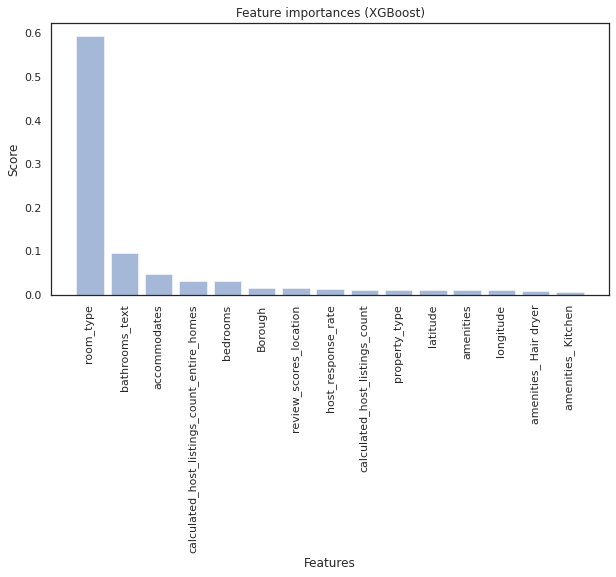

In [236]:
baseline_model=feature_select.copy()

X = baseline_model.drop(columns = ['price_clean_log','Property Index Price','crime'])
Y = baseline_model['price_clean_log']

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.20, random_state = 5)

run_xgboost(X_train, X_test, Y_train, Y_test)

## **Features: Airbnb Data Listing + Review sentiment scores + crime data**

[01:23:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Time taken to run: 0.1 minutes

Training MSE: 0.0061
Validation MSE: 0.0067

Training r2: 0.7408
Validation r2: 0.7214


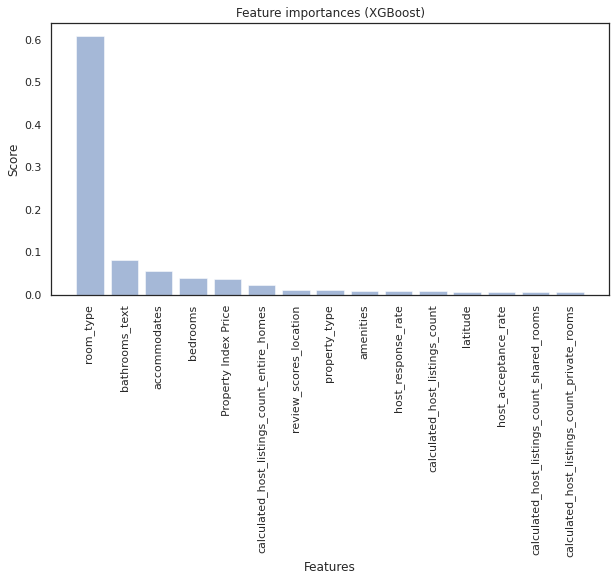

In [237]:
baseline_model=feature_select.copy()

X = baseline_model.drop(columns = ['price_clean_log','crime'])
Y = baseline_model['price_clean_log']

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.20, random_state = 5)

run_xgboost(X_train, X_test, Y_train, Y_test)

## **Features: Airbnb Data Listing + Review sentiment scores + crime data + property**

[01:23:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Time taken to run: 0.1 minutes

Training MSE: 0.0062
Validation MSE: 0.0067

Training r2: 0.7402
Validation r2: 0.7207


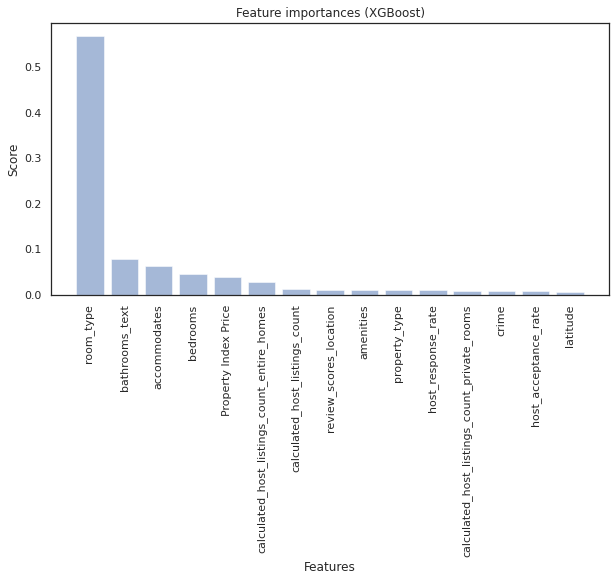

In [238]:
baseline_model=feature_select.copy()

X = baseline_model.drop(columns = ['price_clean_log'])
Y = baseline_model['price_clean_log']

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.20, random_state = 5)

run_xgboost(X_train, X_test, Y_train, Y_test)

# **Prediction Models (Random Forest)**

In [128]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error #metrics
from sklearn.model_selection import train_test_split 

def run_random_forest(X_train, X_test, y_train, y_test):
  
  rf_start = time.time()
  forest = RandomForestRegressor(n_estimators=100, 
                                criterion='mse', 
                                random_state=RAND_STATE, 
                                n_jobs=-1)

  forest.fit(X_train, y_train.squeeze())

  #calculate scores for the model
  y_train_preds = forest.predict(X_train)
  y_test_preds = forest.predict(X_test)

  rf_end = time.time()

  print(f"Time taken to run: {round((rf_end - rf_start)/60,1)} minutes")
  print("\nTraining MSE:", round(mean_squared_error(y_train, y_train_preds),4))
  print("Validation MSE:", round(mean_squared_error(y_test, y_test_preds),4))
  print("\nTraining r2:", round(r2_score(y_train, y_train_preds),4))
  print("Validation r2:", round(r2_score(y_test, y_test_preds),4))

  #get feature importances from the model
  headers = ["name", "score"]
  values = sorted(zip(X_train.columns, forest.feature_importances_), key=lambda x: x[1] * -1)
  forest_feature_importances = pd.DataFrame(values, columns = headers)
  forest_feature_importances = forest_feature_importances.sort_values(by = ['score'], ascending = False)

  features = forest_feature_importances['name'][:15]
  y_pos = np.arange(len(features))
  scores = forest_feature_importances['score'][:15]

  #plot feature importances
  plt.figure(figsize=(10,5))
  plt.bar(y_pos, scores, align='center', alpha=0.5)
  plt.xticks(y_pos, features, rotation='vertical')
  plt.ylabel('Score')
  plt.xlabel('Features')
  plt.title('Feature importances (Random Forest)')

  plt.savefig('feature importances RF.png')
  
  plt.show()

## **Features: Airbnb Data Listing**

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.



Time taken to run: 0.4 minutes

Training MSE: 0.0009
Validation MSE: 0.006

Training r2: 0.9632
Validation r2: 0.7455


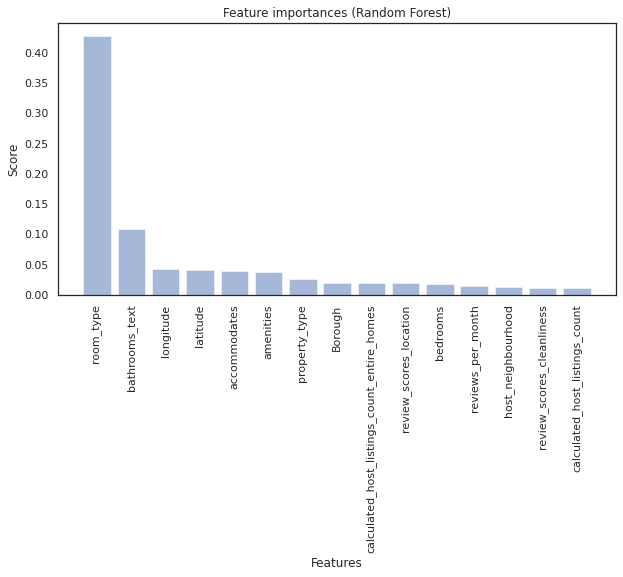

In [239]:
TEST_SIZE = 0.3
RAND_STATE = 42

X = baseline_model.drop(columns = ['price_clean_log','Property Index Price','Review_scores_rating_category','crime'])
y = baseline_model['price_clean_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

run_random_forest(X_train, X_test, y_train, y_test)

## **Features: Airbnb Data Listing + Review sentiment scores**

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.



Time taken to run: 0.4 minutes

Training MSE: 0.0009
Validation MSE: 0.006

Training r2: 0.9632
Validation r2: 0.7455


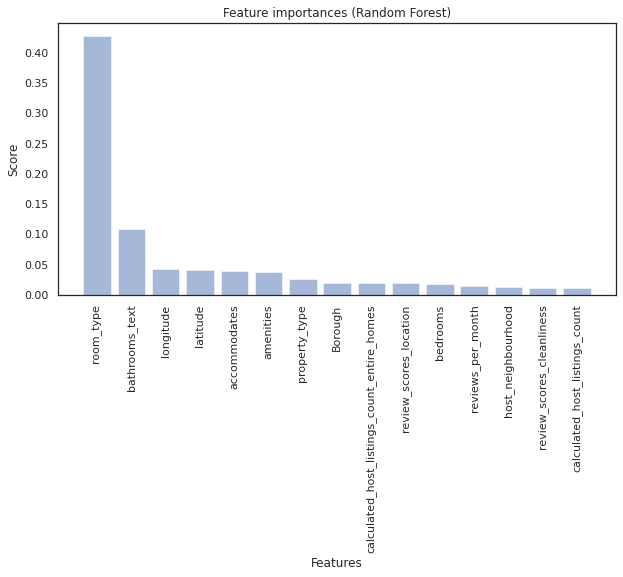

In [131]:
TEST_SIZE = 0.3
RAND_STATE = 42

X = baseline_model.drop(columns = ['price_clean_log','Property Index Price','crime'])
y = baseline_model['price_clean_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

run_random_forest(X_train, X_test, y_train, y_test)

## **Features: Airbnb Data Listing + Review sentiment scores + crime data**

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.



Time taken to run: 0.4 minutes

Training MSE: 0.0009
Validation MSE: 0.006

Training r2: 0.9631
Validation r2: 0.7455


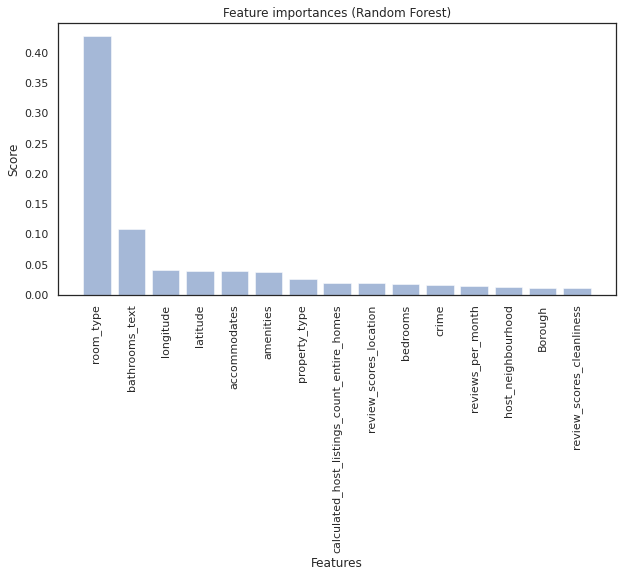

In [132]:
TEST_SIZE = 0.3
RAND_STATE = 42

X = baseline_model.drop(columns = ['price_clean_log','Property Index Price'])
y = baseline_model['price_clean_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

run_random_forest(X_train, X_test, y_train, y_test)

## **Features: Airbnb Data Listing + Review sentiment scores + crime data + property**

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.



Time taken to run: 0.4 minutes

Training MSE: 0.0009
Validation MSE: 0.006

Training r2: 0.9632
Validation r2: 0.747


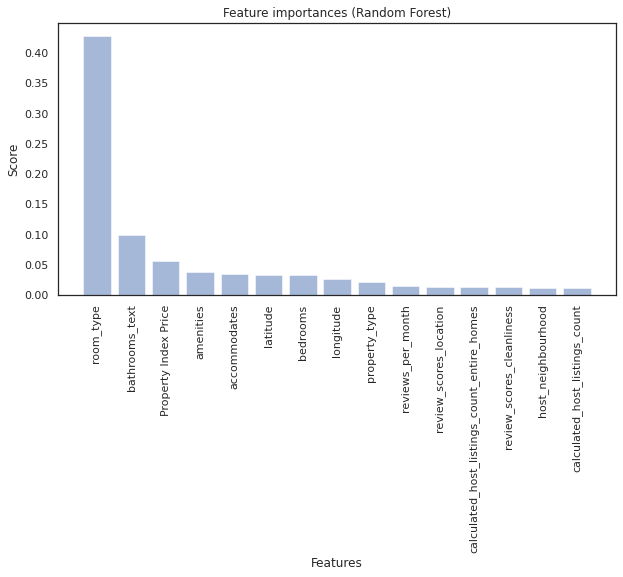

In [133]:
TEST_SIZE = 0.3
RAND_STATE = 42

X = baseline_model.drop(columns = ['price_clean_log'])
y = baseline_model['price_clean_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

run_random_forest(X_train, X_test, y_train, y_test)

# **Prediction Models (SVR)**

In [168]:
from sklearn.svm import SVR
regressor=SVR(kernel='linear')


X = baseline_model.drop(columns = ['price_clean_log'])
Y = baseline_model[['price_clean_log']]

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.20, random_state = 5)

regressor.fit(X_train,Y_train)
pred=regressor.predict(X_test)

In [161]:
print(regressor.score(X_test,Y_test))
from sklearn.metrics import r2_score
print(r2_score(Y_test,pred))

0.6548872507316681
0.6548872507316681


In [169]:
regressor=SVR(kernel='rbf',epsilon=1,degree=3)
regressor.fit(X_train,Y_train)
pred=regressor.predict(X_test)
print(regressor.score(X_test,Y_test))
print(r2_score(Y_test,pred))

-0.05416433774329765
-0.05416433774329765


# **Prediction Models (Linear)**

RMSE:  0.08838754325977465

Training MSE: 0.008
Validation MSE: 0.0078

Training r2: 0.6654
Validation r2: 0.6706


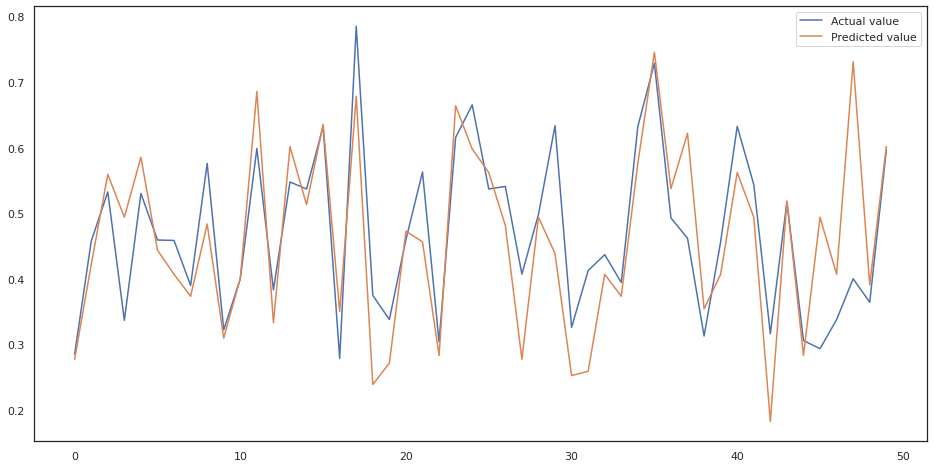

In [254]:
from sklearn.linear_model import LinearRegression

normalised_data.reset_index()
X = normalised_data.drop(columns = ['price_clean_log'],axis=1)
Y = normalised_data['price_clean_log']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_train_preds = linear_model.predict(X_train)
y_test_preds=linear_model.predict(X_test)

lr_rmse = np.sqrt(mean_squared_error(y_test, y_test_preds))

print('RMSE: ',lr_rmse) 

print("\nTraining MSE:", round(mean_squared_error(y_train, y_train_preds),4))
print("Validation MSE:", round(mean_squared_error(y_test, y_test_preds),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_preds),4))
print("Validation r2:", round(r2_score(y_test, y_test_preds),4))

test = pd.DataFrame({'Predicted value':y_test_preds, 'Actual value':y_test})
fig = plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])

# **Prediction Models (Neural Network)**

# **Improvement Test**

In [257]:
from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

# Building the model
nn2 = models.Sequential()
nn2.add(layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(256, activation='relu'))
nn2.add(layers.Dense(1, activation='linear'))

# Compiling the model
nn2.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])



In [258]:
# Training the model

nn2_history = nn2.fit(X_train,
                  y_train,
                  epochs=100,
                  batch_size=256,
                  validation_split = 0.1)


Epoch 1/100
111/111 [==============================] - 5s 39ms/step - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 2/100
111/111 [==============================] - 1s 7ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0083 - val_mean_squared_error: 0.0083
Epoch 3/100
111/111 [==============================] - 1s 7ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 4/100
111/111 [==============================] - 1s 6ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 5/100
111/111 [==============================] - 1s 6ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 6/100
111/111 [==============================] - 1s 6ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 7/100
111/111 [

In [262]:
def nn_model_evaluation(model, skip_epochs=0, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):


    # MSE and r squared values
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print("Training MSE:", round(mean_squared_error(y_train, y_train_pred),4))
    print("Validation MSE:", round(mean_squared_error(y_test, y_test_pred),4))
    print("\nTraining r2:", round(r2_score(y_train, y_train_preds),4))
    print("Validation r2:", round(r2_score(y_test, y_test_preds),4))
    

In [263]:
nn_model_evaluation(nn2)

Training MSE: 0.002
Validation MSE: 0.0095

Training r2: 0.6654
Validation r2: 0.6706


## **By feature selection**

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.



Time taken to run: 0.4 minutes

Training MSE: 0.0009
Validation MSE: 0.006

Training r2: 0.9632
Validation r2: 0.747


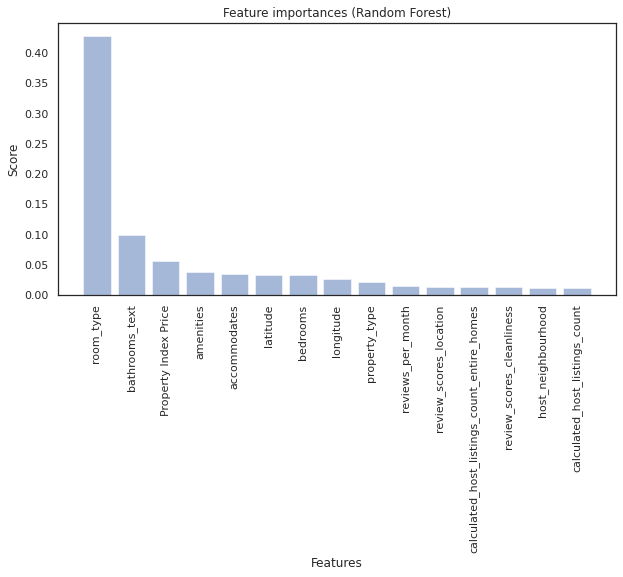

In [138]:
#run random forest
TEST_SIZE = 0.3
RAND_STATE = 42

X = baseline_model.drop(columns = ['price_clean_log'])
y = baseline_model[['price_clean_log']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

run_random_forest(X_train, X_test, y_train, y_test)

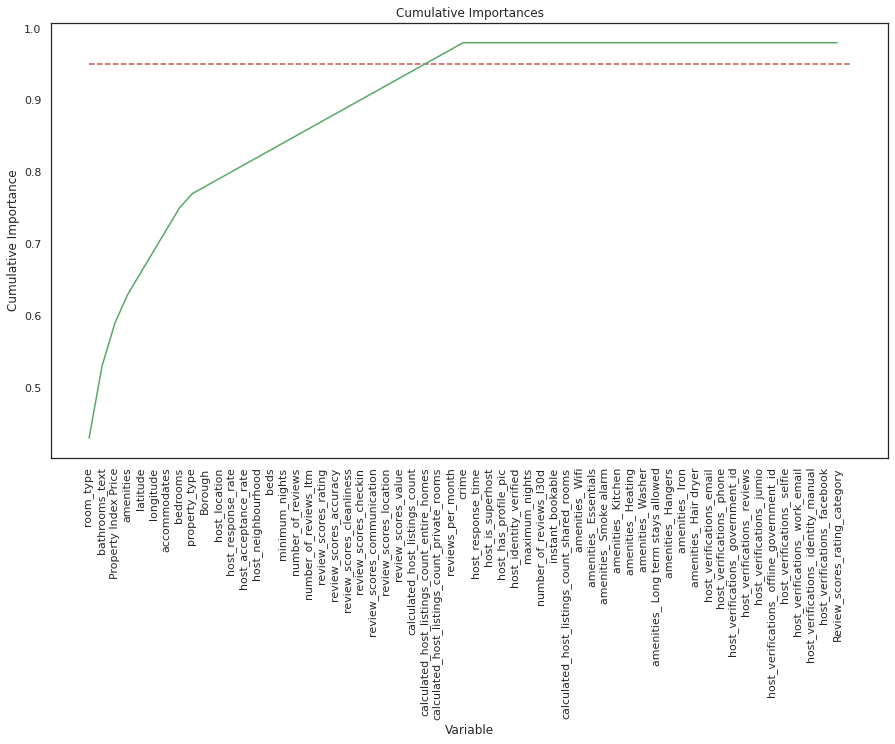

In [139]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [140]:
feature_list = list(X.columns)
# Get numerical feature importances
importances = list(forest.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

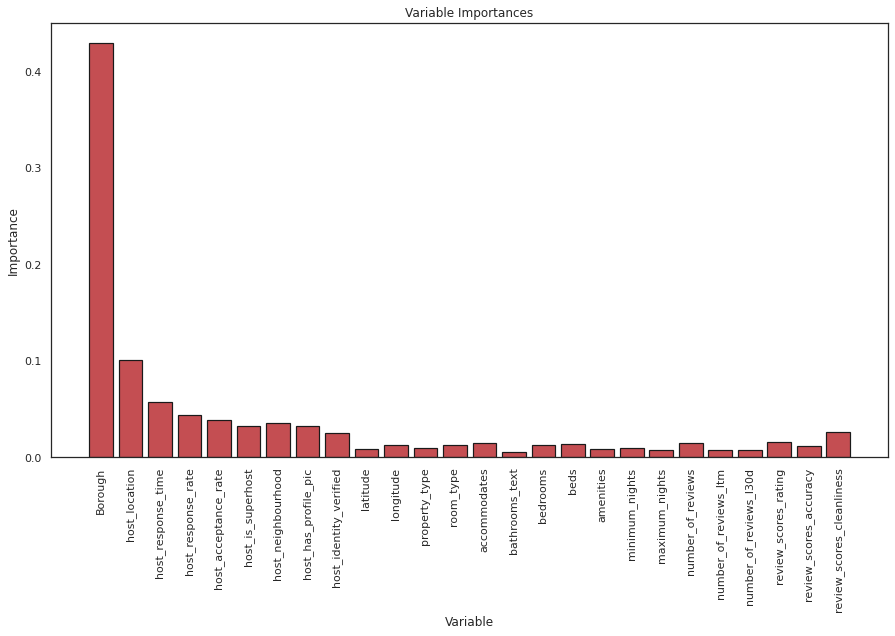

In [141]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [142]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print("Number of features for 95% importance:")
print(np.where(cumulative_importances > 0.95)[0][0] + 1)


Number of features for 95% importance:
27


In [145]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:26]]
# Find the columns of the most important features
important_indices = [feature_list.index(feature) for feature in important_feature_names]
# Create training and testing sets with only the important features

important_train_features=X_train[important_feature_names]

important_test_features=X_test[important_feature_names]

# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (31467, 26)
Important test features shape: (13486, 26)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.



Time taken to run: 0.4 minutes

Training MSE: 0.0009
Validation MSE: 0.006

Training r2: 0.9632
Validation r2: 0.747


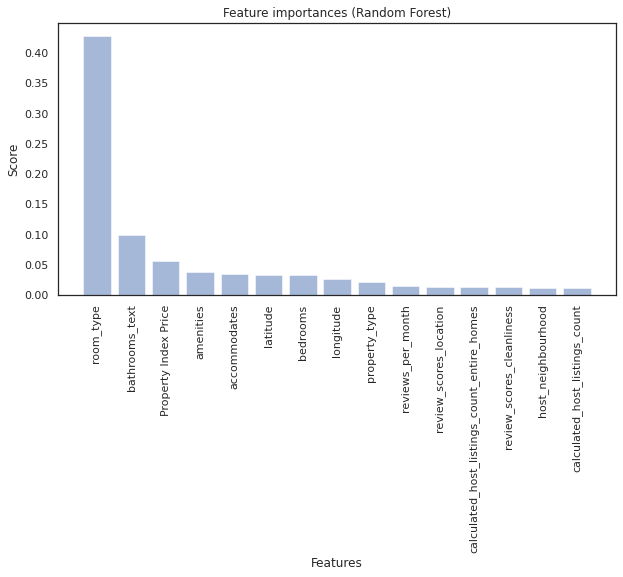

In [146]:
#re-run random forest
TEST_SIZE = 0.3
RAND_STATE = 42

X = baseline_model.drop(columns = ['price_clean_log'])
y = baseline_model[['price_clean_log']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

run_random_forest(X_train, X_test, y_train, y_test)

## **By hyperparameter tuning: GridSearchCV**

In [148]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


X = baseline_model.drop(columns = ['price_clean_log'])
y = baseline_model[['price_clean_log']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)


In [149]:
from sklearn.model_selection import GridSearchCV


# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 20]
}


# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, cv = 3, param_grid=param_grid,n_jobs = -1, verbose = 2)

In [155]:
grid_search.fit(X_train, y_train.squeeze())

best_grid = grid_search.best_estimator_

#calculate scores for the model
y_train_preds = best_grid.predict(X_train)
y_test_preds = best_grid.predict(X_test)

print("\nTraining MSE:", round(mean_squared_error(y_train, y_train_preds),4))
print("Validation MSE:", round(mean_squared_error(y_test, y_test_preds),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_preds),4))
print("Validation r2:", round(r2_score(y_test, y_test_preds),4))

Fitting 3 folds for each of 144 candidates, totalling 432 fits

Training MSE: 0.004
Validation MSE: 0.0068

Training r2: 0.8304
Validation r2: 0.7122
